In [1]:
import numpy as np
import pandas as pd
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score,auc,matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from prettytable import PrettyTable
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
credit = pd.read_csv('UCI_Credit_Cards.csv')

In [3]:
credit.shape

(30000, 25)

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

<AxesSubplot:>

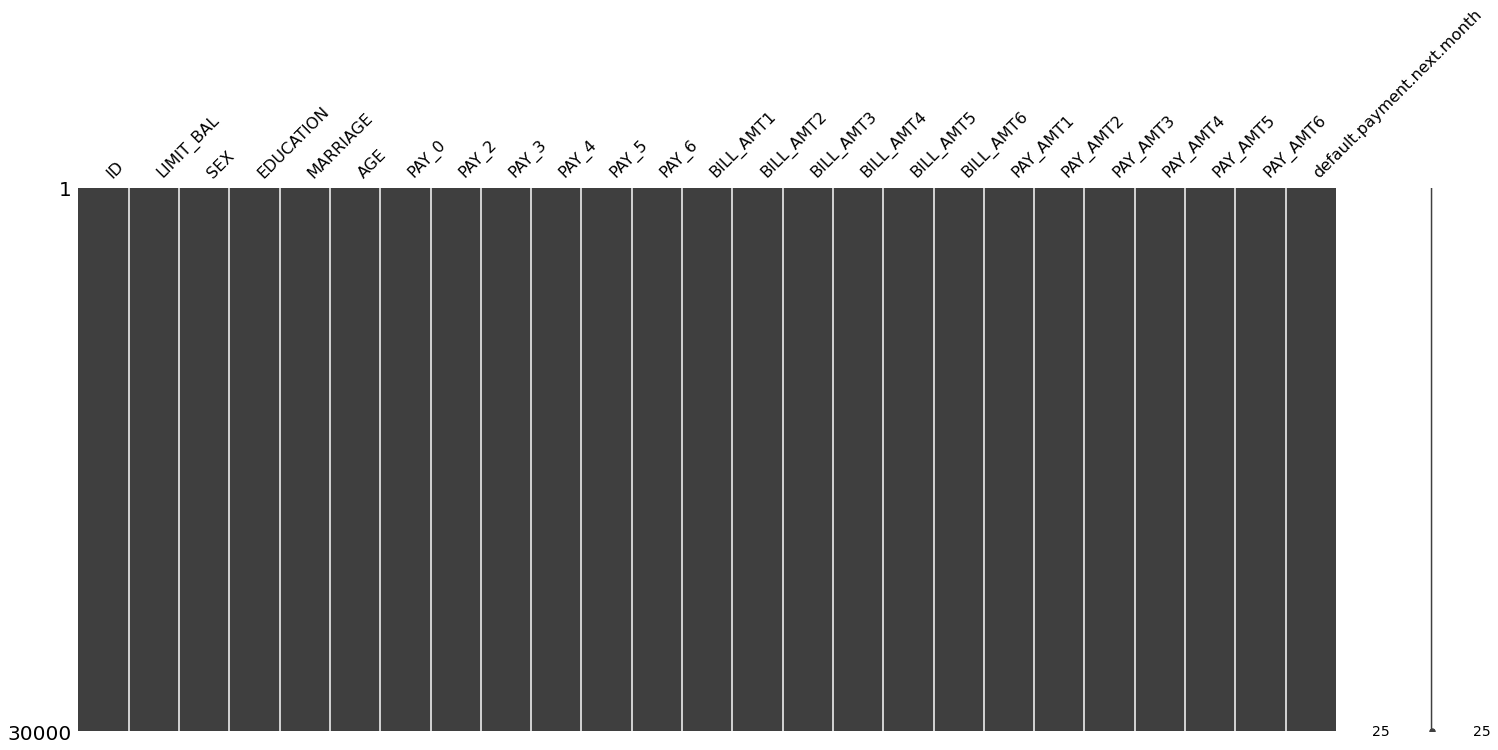

In [5]:
msn.matrix(credit)

In [6]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [7]:
credit.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [8]:
for col in credit.columns:
      print(col ,": ", len(credit[col].unique()))

ID :  30000
LIMIT_BAL :  81
SEX :  2
EDUCATION :  7
MARRIAGE :  4
AGE :  56
PAY_0 :  11
PAY_2 :  11
PAY_3 :  11
PAY_4 :  11
PAY_5 :  10
PAY_6 :  10
BILL_AMT1 :  22723
BILL_AMT2 :  22346
BILL_AMT3 :  22026
BILL_AMT4 :  21548
BILL_AMT5 :  21010
BILL_AMT6 :  20604
PAY_AMT1 :  7943
PAY_AMT2 :  7899
PAY_AMT3 :  7518
PAY_AMT4 :  6937
PAY_AMT5 :  6897
PAY_AMT6 :  6939
default.payment.next.month :  2


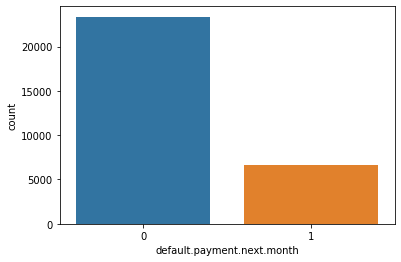

In [9]:
sns.countplot(credit['default.payment.next.month'])
plt.show()

In [10]:
credit['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [11]:
credit.describe().T 

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


- No missing values, as the count is 30000 for all the features.

In [12]:
credit.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [13]:
# A function which returns the outlier's location of array values.
def outliers_iqr(ys):
    Q1, Q3 = np.percentile(ys, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [14]:
credit.loc[outliers_iqr(credit["BILL_AMT1"])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
17,18,320000.0,1,1,1,49,0,0,0,-1,...,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0
36,37,280000.0,1,2,1,40,0,0,0,0,...,170410.0,173901.0,177413.0,8026.0,8060.0,6300.0,6400.0,6400.0,6737.0,0
40,41,360000.0,1,1,2,33,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
57,58,180000.0,2,2,1,34,0,0,0,0,...,168608.0,132202.0,129918.0,8083.0,7296.0,5253.0,4814.0,4816.0,3800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29921,29922,410000.0,1,1,2,34,0,0,0,-1,...,1467.0,1421.0,-15.0,17259.0,18600.0,1474.0,1428.0,0.0,0.0,1
29963,29964,610000.0,1,1,2,31,0,-1,2,-1,...,347303.0,248893.0,269528.0,323014.0,1605.0,349395.0,250144.0,271099.0,220076.0,0
29978,29979,310000.0,1,2,1,39,0,0,0,0,...,219409.0,216540.0,210675.0,10029.0,9218.0,10029.0,8049.0,8040.0,10059.0,0
29988,29989,250000.0,1,1,1,34,0,0,0,0,...,245750.0,175005.0,179687.0,65000.0,8800.0,9011.0,6000.0,7000.0,6009.0,0


In [15]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features: #Finding the outliers in all the features by iterating.
        Q1 = np.percentile(df[c],25) #1st quartile
        Q3 = np.percentile(df[c],75) #3rd quartile
        IQR = Q3-Q1
        outlier_step= IQR * 1.5
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index #Detect outlier and their indices
        outlier_indices.extend(outlier_list_col)
 # Using a counter we get to know if the same record is treated as outlier in all the features or not.
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2) # Record is considered outlier for more than 2 features.
    return multiple_outliers

In [16]:
credit.loc[detect_outliers(credit,['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
17,18,320000.0,1,1,1,49,0,0,0,-1,...,70074.0,5856.0,195599.0,10358.0,10000.0,75940.0,20000.0,195599.0,50000.0,0
36,37,280000.0,1,2,1,40,0,0,0,0,...,170410.0,173901.0,177413.0,8026.0,8060.0,6300.0,6400.0,6400.0,6737.0,0
40,41,360000.0,1,1,2,33,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
57,58,180000.0,2,2,1,34,0,0,0,0,...,168608.0,132202.0,129918.0,8083.0,7296.0,5253.0,4814.0,4816.0,3800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29479,29480,140000.0,1,1,2,33,0,0,0,0,...,136481.0,135012.0,133324.0,7000.0,7000.0,7000.0,5500.0,6000.0,4624.0,0
29548,29549,220000.0,1,1,2,31,0,0,2,2,...,151588.0,147656.0,157276.0,12000.0,0.0,27500.0,0.0,12000.0,0.0,1
29801,29802,260000.0,1,1,2,33,2,2,2,2,...,142480.0,145630.0,150147.0,7000.0,0.0,18000.0,7000.0,7000.0,5500.0,0
29965,29966,140000.0,1,2,1,32,0,0,0,0,...,137450.0,135638.0,136375.0,6300.0,6500.0,6300.0,6000.0,5200.0,5000.0,0


In [17]:
# For ease renaming the target varible as def_pay, PAY_0 doesn't make any sense so renaming it to PAY_1.
credit = credit.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [18]:
credit.EDUCATION.value_counts() 

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [19]:
credit.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [20]:
credit.MARRIAGE.value_counts() 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [21]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure(figsize=(8,6))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        credit[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # To avoid overlapping between the plots.
    plt.show()

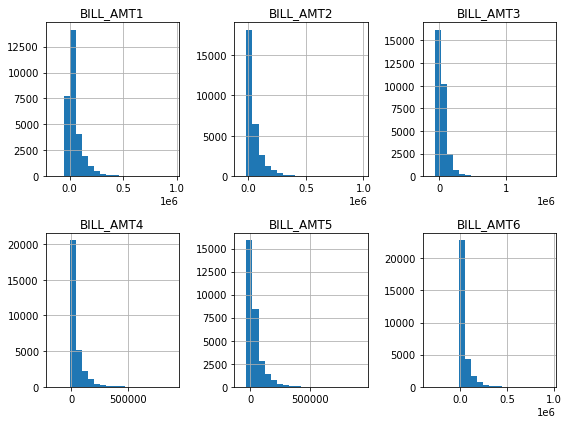

In [22]:
bills = credit[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

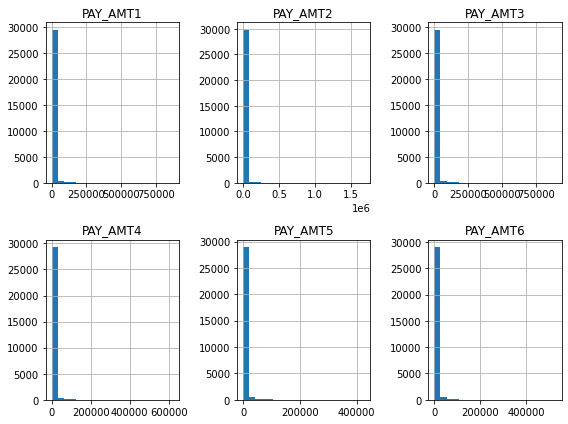

In [23]:
pay = credit[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

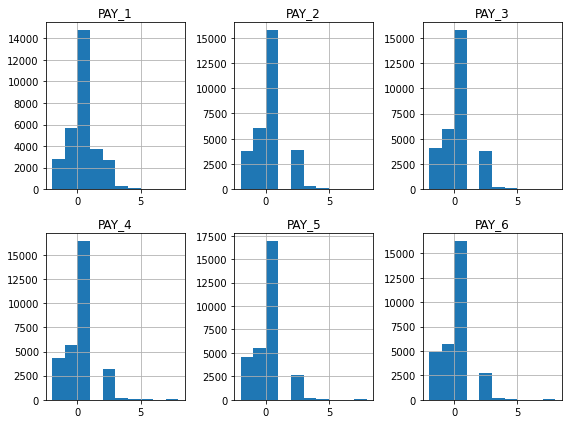

In [24]:
late = credit[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)


<AxesSubplot:>

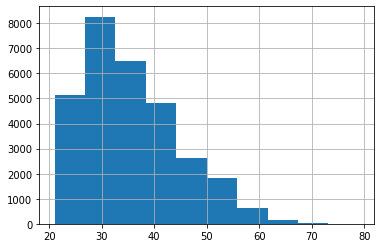

In [25]:
credit.AGE.hist()

<AxesSubplot:>

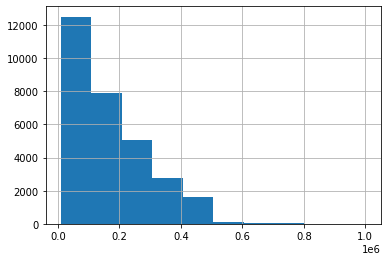

In [26]:
credit.LIMIT_BAL.hist()

In [27]:
credit.EDUCATION = credit.EDUCATION.apply(lambda x: 1 if x == 1 else 
                           (2 if x == 2 else(3 if x == 3 else 4 )))

In [28]:
credit.MARRIAGE = credit.MARRIAGE.apply(lambda x:1 if x == 1 else (2 if x==2 else 3))

In [29]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [30]:
def pay_fil(col):
    for i in credit[col].index:
        if credit[col][i] == -2:
            credit[col][i] = 0
        if credit[col][i] == 0:
            credit[col][i] = 0
        if credit[col][i] == -1:
            credit[col][i] = 0
            

pay_fil('PAY_1')
pay_fil('PAY_2')
pay_fil('PAY_3')
pay_fil('PAY_4')
pay_fil('PAY_5')
pay_fil('PAY_6')

In [31]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


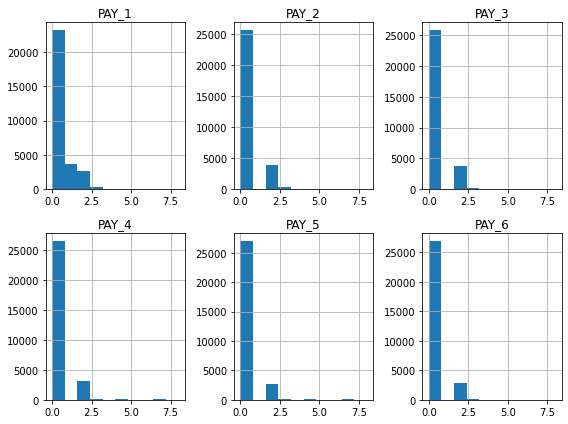

In [32]:
late = credit[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [33]:
credit[credit.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'def_pay']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,def_pay
2592,480000.0,1,0,38929.0,39149.0,-220.0,0
3774,500000.0,0,0,39356.0,39560.0,103880.0,0
5296,500000.0,0,0,-18088.0,4366.0,125.0,0
5400,500000.0,0,0,8970.0,8982.0,27891.0,0
6150,300000.0,1,0,-5973.0,1720.0,-3928.0,1
6864,500000.0,0,0,201402.0,40000.0,192257.0,0
9044,500000.0,0,0,24201.0,24201.0,51465.0,0
11568,430000.0,0,0,960.0,510.0,52930.0,1
11853,360000.0,1,1,-22960.0,0.0,277040.0,0
12829,340000.0,0,0,335584.0,16004.0,327058.0,1


In [34]:
pd.crosstab(credit.SEX, credit.def_pay)

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


In [35]:
credit[["SEX", "def_pay"]].groupby(['SEX']).mean().sort_values(by='def_pay')

,def_pay
SEX,
2,0.207763
1,0.241672


In [36]:
def corr_2_cols(Col1, Col2):
    res = credit.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [37]:
corr_2_cols('EDUCATION', 'def_pay')

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


In [38]:
corr_2_cols('MARRIAGE', 'def_pay')

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


In [39]:
credit['SEX_MAR'] = credit.SEX * credit.MARRIAGE
corr_2_cols('SEX_MAR', 'def_pay')

def_pay,0,1,perc
SEX_MAR,,,
1,3844,1346,0.259345
2,11677,3345,0.222673
3,103,42,0.289655
4,7555,1856,0.197216
6,185,47,0.202586


In [40]:
credit['SEX_MAR2'] = 0
credit.loc[((credit.SEX == 1) & (credit.MARRIAGE == 1)) , 'SEX_MAR2'] = 1 # Married male 
credit.loc[((credit.SEX == 1) & (credit.MARRIAGE == 2)) , 'SEX_MAR2'] = 2 # Single male 
credit.loc[((credit.SEX == 1) & (credit.MARRIAGE == 3)) , 'SEX_MAR2'] = 3 
credit.loc[((credit.SEX == 2) & (credit.MARRIAGE == 1)) , 'SEX_MAR2'] = 4 
credit.loc[((credit.SEX == 2) & (credit.MARRIAGE == 2)) , 'SEX_MAR2'] = 5 
credit.loc[((credit.SEX == 2) & (credit.MARRIAGE == 3)) , 'SEX_MAR2'] = 6 
corr_2_cols('SEX_MAR2', 'def_pay')

def_pay,0,1,perc
SEX_MAR2,,,
1,3844,1346,0.259345
2,5068,1485,0.226614
3,103,42,0.289655
4,6609,1860,0.219625
5,7555,1856,0.197216
6,185,47,0.202586


<AxesSubplot:>

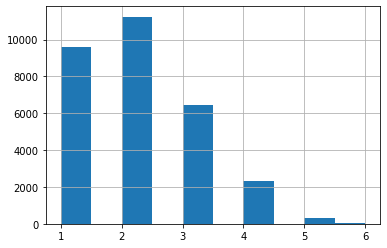

In [41]:
credit['AgeBin'] = 0 #creates a column of 0
credit.loc[((credit['AGE'] > 20) & (credit['AGE'] < 30)) , 'AgeBin'] = 1
credit.loc[((credit['AGE'] >= 30) & (credit['AGE'] < 40)) , 'AgeBin'] = 2
credit.loc[((credit['AGE'] >= 40) & (credit['AGE'] < 50)) , 'AgeBin'] = 3
credit.loc[((credit['AGE'] >= 50) & (credit['AGE'] < 60)) , 'AgeBin'] = 4
credit.loc[((credit['AGE'] >= 60) & (credit['AGE'] < 70)) , 'AgeBin'] = 5
credit.loc[((credit['AGE'] >= 70) & (credit['AGE'] < 81)) , 'AgeBin'] = 6
credit.AgeBin.hist()

In [42]:
corr_2_cols('AgeBin', 'def_pay')

def_pay,0,1,perc
AgeBin,,,
1,7421,2197,0.228426
2,8962,2276,0.202527
3,4979,1485,0.229734
4,1759,582,0.248612
5,225,89,0.283439
6,18,7,0.280000


In [43]:
credit['SEX_AGE'] = 0
credit.loc[((credit.SEX == 1) & (credit.AgeBin == 1)) , 'SEX_AGE'] = 1 #man in 20's
credit.loc[((credit.SEX == 1) & (credit.AgeBin == 2)) , 'SEX_AGE'] = 2 #man in 30's
credit.loc[((credit.SEX == 1) & (credit.AgeBin == 3)) , 'SEX_AGE'] = 3 #man in 40's
credit.loc[((credit.SEX == 1) & (credit.AgeBin == 4)) , 'SEX_AGE'] = 4 #man in 50's
credit.loc[((credit.SEX == 1) & (credit.AgeBin == 5)) , 'SEX_AGE'] = 5 #man in 60's and above
credit.loc[((credit.SEX == 2) & (credit.AgeBin == 1)) , 'SEX_AGE'] = 6 #woman in 20's
credit.loc[((credit.SEX == 2) & (credit.AgeBin == 2)) , 'SEX_AGE'] = 7 #woman in 30's
credit.loc[((credit.SEX == 2) & (credit.AgeBin == 3)) , 'SEX_AGE'] = 8 #woman in 40's
credit.loc[((credit.SEX == 2) & (credit.AgeBin == 4)) , 'SEX_AGE'] = 9 #woman in 50's
credit.loc[((credit.SEX == 2) & (credit.AgeBin == 5)) , 'SEX_AGE'] = 10 #woman in 60's and above
corr_2_cols('SEX_AGE', 'def_pay')

def_pay,0,1,perc
SEX_AGE,,,
0,18,7,0.280000
1,2492,789,0.240475
2,3515,1050,0.230011
3,2080,691,0.249368
4,797,295,0.270147
5,122,44,0.265060
6,4929,1408,0.222187
7,5447,1226,0.183725
8,2899,794,0.215001


In [44]:
credit['Proximity_6'] = (credit.LIMIT_BAL - credit.BILL_AMT6) / credit.LIMIT_BAL
credit['Proximity_5'] = (credit.LIMIT_BAL - credit.BILL_AMT5) / credit.LIMIT_BAL
credit['Proximity_4'] = (credit.LIMIT_BAL - credit.BILL_AMT4) / credit.LIMIT_BAL
credit['Proximity_3'] = (credit.LIMIT_BAL - credit.BILL_AMT3) / credit.LIMIT_BAL
credit['Proximity_2'] = (credit.LIMIT_BAL - credit.BILL_AMT2) / credit.LIMIT_BAL
credit['Proximity_1'] = (credit.LIMIT_BAL - credit.BILL_AMT1) / credit.LIMIT_BAL
credit[['Proximity_6', 'Proximity_5', 'Proximity_4', 'Proximity_3', 'Proximity_2',
   'Proximity_1', 'def_pay']].sample(10)

,Proximity_6,Proximity_5,Proximity_4,Proximity_3,Proximity_2,Proximity_1,def_pay
24587,0.761989,0.904349,0.907517,0.909034,0.915734,0.891369,0
9324,0.867038,0.821887,0.770613,0.557887,0.784338,0.803262,0
9990,0.906000,0.877300,0.846682,0.846876,0.851800,0.855624,0
29500,0.070600,0.041400,0.107200,0.110700,0.081800,0.523000,1
6738,1.000014,1.000014,1.000000,1.000000,1.000000,1.000000,1
29792,1.000000,1.000000,1.000000,1.000000,0.997500,0.989525,0
2704,0.423080,0.438360,0.434500,0.044880,0.097360,0.058680,0
22867,0.992857,0.989524,0.967357,0.961081,0.972967,0.943581,0
9400,0.450480,0.662280,0.634180,0.438460,0.162540,0.103020,1
22163,0.268627,0.286336,0.310200,0.323827,0.340473,0.092036,1


In [45]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay',
       'SEX_MAR', 'SEX_MAR2', 'AgeBin', 'SEX_AGE', 'Proximity_6',
       'Proximity_5', 'Proximity_4', 'Proximity_3', 'Proximity_2',
       'Proximity_1'],
      dtype='object')

##  Splitting the data

In [47]:
X = credit.drop(['def_pay','ID'], axis=1)  
Y = credit['def_pay']

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
extra = ExtraTreesRegressor()
extra.fit(X,Y)

ExtraTreesRegressor()

In [49]:
print(X.shape)

(30000, 33)


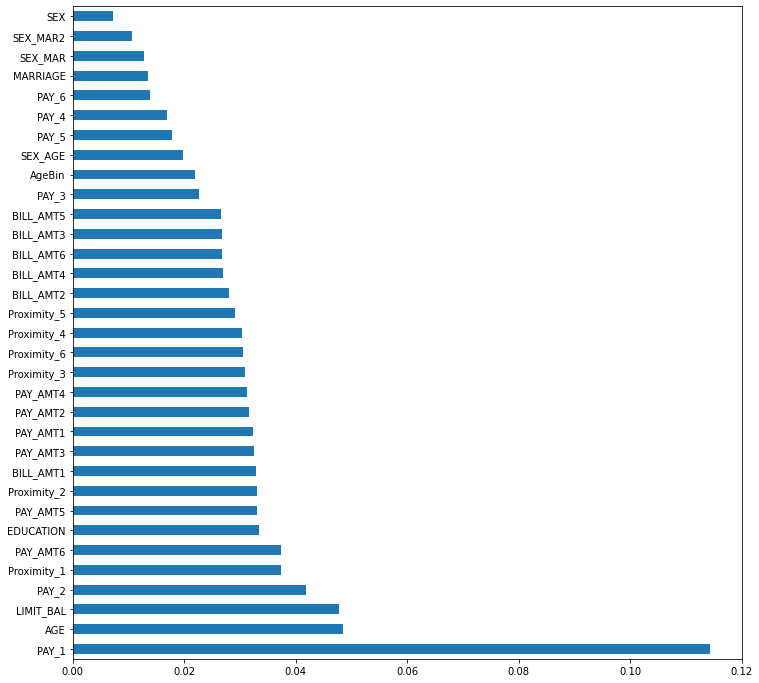

In [51]:
plt.figure(figsize=(12,12))
feature_importances = pd.Series(extra.feature_importances_, index= X.columns)
feature_importances.nlargest(33).plot(kind='barh')
plt.show()

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=42)

## Scaling the features

In [47]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

## Sampling Techniques

In [48]:
# create the training df by remerging X_train and y_train
df_train = x_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,SEX_MAR2,AgeBin,SEX_AGE,Proximity_6,Proximity_5,Proximity_4,Proximity_3,Proximity_2,Proximity_1,def_pay
20841,140000.0,1,1,1,43,0,0,0,0,0,...,1,3,3,0.989621,0.989621,0.986629,0.991079,0.986629,0.989621,0
16549,150000.0,1,1,2,29,2,0,0,0,0,...,2,1,1,0.809893,0.873907,0.883180,0.905993,0.929273,0.949587,0
19033,30000.0,2,2,1,45,0,0,0,0,0,...,4,3,8,-0.023067,0.118933,0.092800,0.090200,-0.013167,-0.026267,1
18126,160000.0,1,3,1,42,0,0,0,0,0,...,1,3,3,0.481756,0.597437,0.607700,0.444025,0.443163,0.525956,0
11273,50000.0,2,2,2,29,0,0,0,0,0,...,5,1,6,0.604160,0.612240,0.602700,0.210440,0.120100,0.099740,0
19855,70000.0,2,2,1,38,1,2,0,0,2,...,4,2,7,0.015557,-0.020371,-0.046129,-0.018300,-0.003629,-0.052686,1
15691,10000.0,1,1,2,26,0,0,0,0,0,...,2,1,1,-0.015100,-0.006600,0.023500,0.141900,0.261400,0.362400,1
11282,50000.0,1,3,1,47,1,2,0,0,0,...,1,3,3,0.257440,0.275400,0.645120,0.020980,-0.303960,-0.339560,1
16985,240000.0,2,1,2,28,0,0,0,0,0,...,5,1,6,0.192817,0.176483,0.134862,-0.010192,0.014600,0.027329,0
13005,100000.0,2,3,2,58,0,0,0,0,0,...,5,4,9,0.485960,0.524810,0.534240,0.543660,0.553140,0.566140,0


In [49]:
# Separate majority and minority classes
df_majority = df_train[df_train.def_pay==0]
df_minority = df_train[df_train.def_pay==1]

print(df_majority.def_pay.count())
print("-----------")
print(df_minority.def_pay.count())
print("-----------")
print(df_train.def_pay.value_counts())

16355
-----------
4645
-----------
0    16355
1     4645
Name: def_pay, dtype: int64


 ### Upsampling

In [50]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=16355,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.def_pay.value_counts()

1    16355
0    16355
Name: def_pay, dtype: int64

In [51]:
X_upsampled = df_upsampled.drop(['def_pay'], axis= 1)
y_upsampled = df_upsampled.def_pay

print(X_upsampled.shape)
print(y_upsampled.shape)

(32710, 33)
(32710,)


In [52]:
sc = StandardScaler()
x_upsampled_std = sc.fit_transform(X_upsampled)
x_test_up = sc.transform(x_test)

### Downsampling

In [53]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4645,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.def_pay.value_counts()

1    4645
0    4645
Name: def_pay, dtype: int64

In [54]:
X_downsampled = df_downsampled.drop(['def_pay'], axis= 1)
y_downsampled = df_downsampled.def_pay

print(X_downsampled.shape)
print(y_downsampled.shape)

(9290, 33)
(9290,)


In [55]:
sc = StandardScaler()
x_downsampled_std = sc.fit_transform(X_downsampled)
x_test_down = sc.transform(x_test)

### SMOTE - Synthetic Minority Oversampling TEchnique

In [56]:
sm = SMOTE(random_state=587)
X_SMOTE, y_SMOTE = sm.fit_sample(x_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())
print(y_SMOTE.value_counts())

32710
16355
1    16355
0    16355
Name: def_pay, dtype: int64


In [57]:
sc = StandardScaler()
x_SMOTE_std = sc.fit_transform(X_SMOTE)
x_test_smote = sc.transform(x_test)

## 1.Logistic Regression

In [643]:
LR = LogisticRegression(random_state=0)
LR.fit(x_train_std, y_train)

LogisticRegression(random_state=0)

In [644]:
y_pred = LR.predict(x_test_std)
cv_scores = cross_val_score(LR, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.362
Accuracy: 0.809
True Positives: 487
False Positive: 211
True Negative: 6798
False Negative: 1504
Precision: 0.698
Recall: 0.245
Mathew Correlation Coefficient: 0.333
Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0002


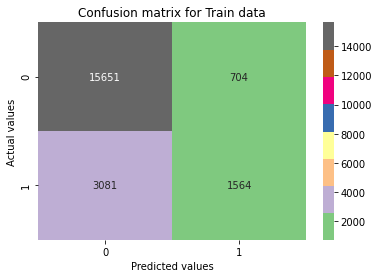

In [645]:
cmt = confusion_matrix(y_train, LR.predict(x_train_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion matrix for Train data')
plt.show()

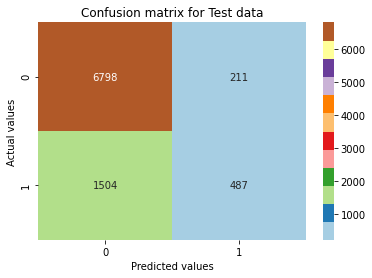

In [646]:
cmt = confusion_matrix(y_test, LR.predict(x_test_std))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

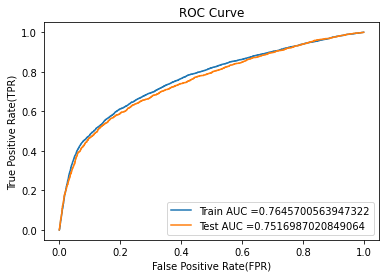

In [647]:
y_test_pred = LR.predict_proba(x_test_std)[:,1]
y_train_pred = LR.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 1.a.Logistic Regression with GridSearchCV

In [648]:
grid={'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train_std,y_train)

print("Best Hyper-parameters after GridSearchCv are - ",logreg_cv.best_params_)
best_params = logreg_cv.best_params_

Best Hyper-parameters after GridSearchCv are -  {'C': 0.03359818286283781, 'penalty': 'l1', 'solver': 'liblinear'}


In [649]:
log_cv = LogisticRegression(**best_params)
log_cv.fit(x_train_std, y_train)

LogisticRegression(C=0.03359818286283781, penalty='l1', solver='liblinear')

In [653]:
y_pred = log_cv.predict(x_test_std)
cv_scores = cross_val_score(log_cv, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.363
Accuracy: 0.809
True Positives: 489
False Positive: 213
True Negative: 6796
False Negative: 1502
Precision: 0.697
Recall: 0.246
Mathew Correlation Coefficient: 0.333
Average 5-Fold CV Score: 0.8176 , Standard deviation: 0.0087


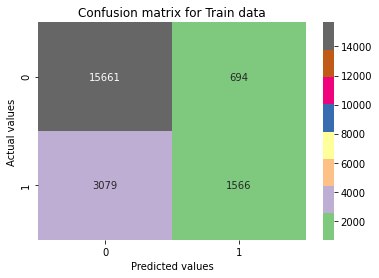

In [650]:
cmt = confusion_matrix(y_train, log_cv.predict(x_train_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

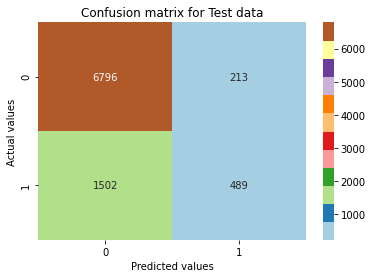

In [652]:
cmt = confusion_matrix(y_test, log_cv.predict(x_test_std))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

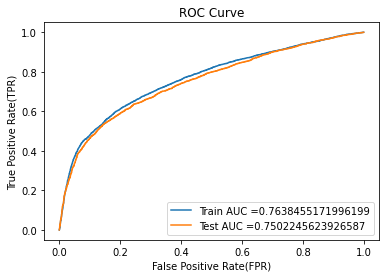

In [655]:
y_test_pred = log_cv.predict_proba(x_test_std)[:,1]
y_train_pred = log_cv.predict_proba(x_train_std)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 1.b.Logistic Regression - Upsampled data

In [672]:
Log_upsampled = LogisticRegression(random_state=0)
Log_upsampled.fit(x_upsampled_std, y_upsampled)
y_pred = Log_upsampled.predict(x_test_std)
cv_scores = cross_val_score(Log_upsampled, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.519
Accuracy: 0.774
True Positives: 1099
False Positive: 1141
True Negative: 5868
False Negative: 892
Precision: 0.491
Recall: 0.552
Mathew Correlation Coefficient: 0.374
Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0002


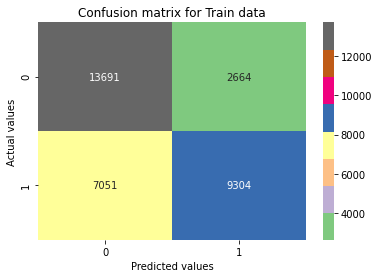

In [673]:
cmt = confusion_matrix(y_upsampled, Log_upsampled.predict(x_upsampled_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

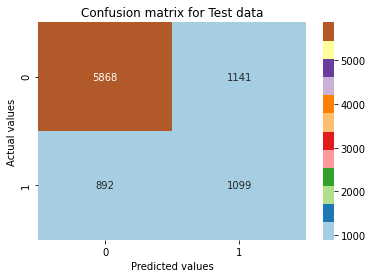

In [674]:
cmt = confusion_matrix(y_test, Log_upsampled.predict(x_test_std))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

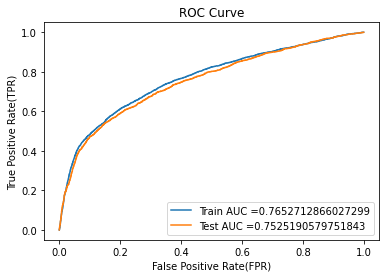

In [675]:
y_test_pred = Log_upsampled.predict_proba(x_test_std)[:,1]
y_train_pred = Log_upsampled.predict_proba(x_upsampled_std)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_upsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 1.b.a.Logistic Regression with GridSearchCV


In [676]:
grid={'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_upsampled_std,y_upsampled)

print("Best Hyper-parameters after GridSearchCv are - ",logreg_cv.best_params_)
best_params = logreg_cv.best_params_

Best Hyper-parameters after GridSearchCv are -  {'C': 0.012742749857031334, 'penalty': 'l2', 'solver': 'liblinear'}


In [677]:
Log_upsampled_cv = LogisticRegression(**best_params)
Log_upsampled_cv.fit(x_upsampled_std, y_upsampled)
y_pred = Log_upsampled_cv.predict(x_test_std)
cv_scores = cross_val_score(Log_upsampled_cv, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.521
Accuracy: 0.775
True Positives: 1100
False Positive: 1133
True Negative: 5876
False Negative: 891
Precision: 0.493
Recall: 0.552
Mathew Correlation Coefficient: 0.376
Average 5-Fold CV Score: 0.7787 , Standard deviation: 0.0001


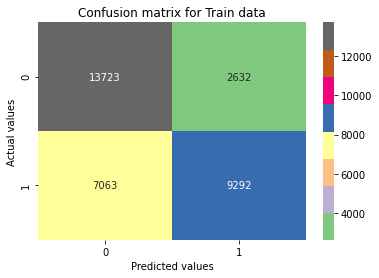

In [678]:
cmt = confusion_matrix(y_upsampled, Log_upsampled_cv.predict(x_upsampled_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

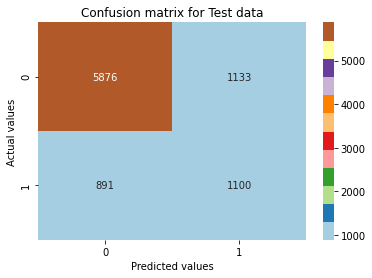

In [679]:
cmt = confusion_matrix(y_test, Log_upsampled_cv.predict(x_test_std))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

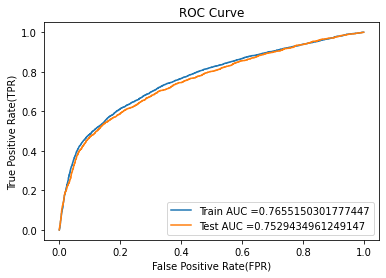

In [680]:
y_test_pred = logup_cv.predict_proba(x_test_std)[:,1]
y_train_pred = logup_cv.predict_proba(x_upsampled_std)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_upsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 1.c.Logistic Regression - Downsampled data

In [683]:
Log_downsampled = LogisticRegression(random_state=0)
Log_downsampled.fit(x_downsampled_std, y_downsampled)
y_pred = Log_downsampled.predict(x_test_std)
cv_scores = cross_val_score(Log_downsampled, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.519
Accuracy: 0.775
True Positives: 1092
False Positive: 1125
True Negative: 5884
False Negative: 899
Precision: 0.493
Recall: 0.548
Mathew Correlation Coefficient: 0.374
Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0002


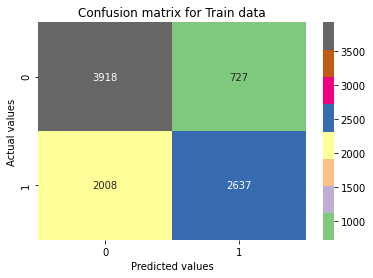

In [684]:
cmt = confusion_matrix(y_downsampled, Log_downsampled.predict(x_downsampled_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

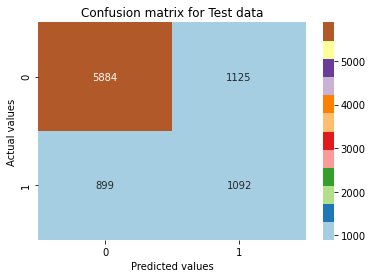

In [685]:
cmt = confusion_matrix(y_test, Log_downsampled.predict(x_test_std))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

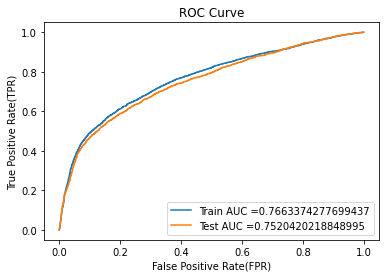

In [686]:
y_test_pred = Log_downsampled.predict_proba(x_test_std)[:,1]
y_train_pred = Log_downsampled.predict_proba(x_downsampled_std)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_downsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 1.c.a.Logistic Regression with GridSearchCV

In [698]:
grid={'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_downsampled_std,y_downsampled)

print("Best Hyper-parameters after GridSearchCv are - ",logreg_cv.best_params_)
best_params = logreg_cv.best_params_

Best Hyper-parameters after GridSearchCv are -  {'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'liblinear'}


In [699]:
Log_downsampled_cv = LogisticRegression(**best_params)
Log_downsampled_cv.fit(x_downsampled_std, y_downsampled)
y_pred = Log_downsampled_cv.predict(x_test_std)
cv_scores = cross_val_score(Log_downsampled_cv, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.519
Accuracy: 0.769
True Positives: 1121
False Positive: 1206
True Negative: 5803
False Negative: 870
Precision: 0.482
Recall: 0.563
Mathew Correlation Coefficient: 0.371
Average 5-Fold CV Score: 0.7787 , Standard deviation: 0.0001


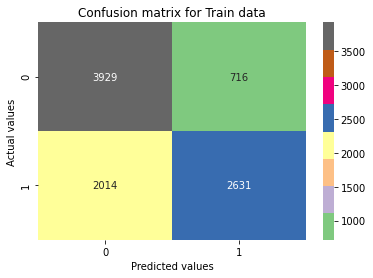

In [700]:
cmt = confusion_matrix(y_downsampled, Log_downsampled_cv.predict(x_downsampled_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

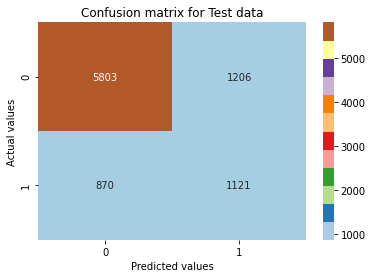

In [701]:
cmt = confusion_matrix(y_test, Log_downsampled_cv.predict(x_test_std))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

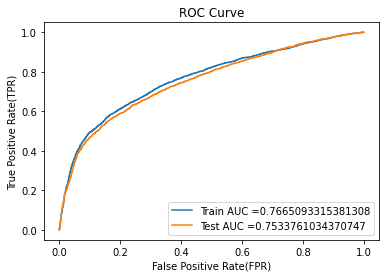

In [702]:
y_test_pred = Log_downsampled_cv.predict_proba(x_test_std)[:,1]
y_train_pred = Log_downsampled_cv.predict_proba(x_downsampled_std)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_downsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 1.d.Logistic Regression - SMOTE

In [704]:
Log_smote = LogisticRegression(**best_params)
Log_smote.fit(x_SMOTE_std, y_SMOTE)
y_pred = Log_downsampled_cv.predict(x_test_std)
cv_scores = cross_val_score(Log_smote, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.519
Accuracy: 0.769
True Positives: 1121
False Positive: 1206
True Negative: 5803
False Negative: 870
Precision: 0.482
Recall: 0.563
Mathew Correlation Coefficient: 0.371
Average 5-Fold CV Score: 0.7787 , Standard deviation: 0.0001


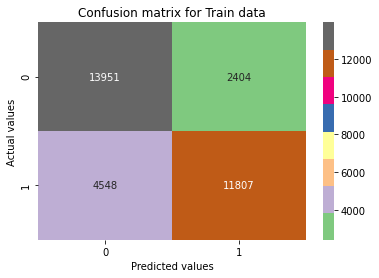

In [705]:
cmt = confusion_matrix(y_SMOTE, Log_smote.predict(x_SMOTE_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

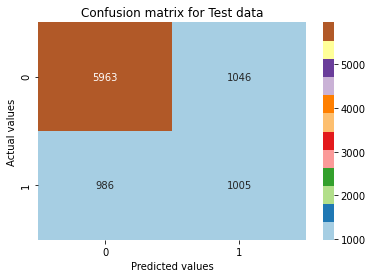

In [706]:
cmt = confusion_matrix(y_test, Log_smote.predict(x_test_std))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

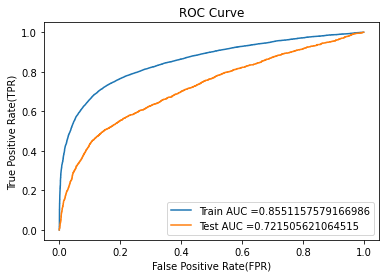

In [707]:
y_test_pred = Log_smote.predict_proba(x_test_std)[:,1]
y_train_pred = Log_smote.predict_proba(x_SMOTE_std)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_SMOTE, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 1.d.a Logistic Regression with GridSearchCV

In [708]:
grid={'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_SMOTE_std,y_SMOTE)

print("Best Hyper-parameters after GridSearchCv are - ",logreg_cv.best_params_)
best_params = logreg_cv.best_params_

Best Hyper-parameters after GridSearchCv are -  {'C': 1438.44988828766, 'penalty': 'l2', 'solver': 'liblinear'}


In [709]:
Log_smote_cv = LogisticRegression(**best_params)
Log_smote_cv.fit(x_SMOTE_std, y_SMOTE)
y_pred = Log_smote_cv.predict(x_test_std)
cv_scores = cross_val_score(Log_smote_cv, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.497
Accuracy: 0.78
True Positives: 979
False Positive: 969
True Negative: 6040
False Negative: 1012
Precision: 0.503
Recall: 0.492
Mathew Correlation Coefficient: 0.356
Average 5-Fold CV Score: 0.7787 , Standard deviation: 0.0001


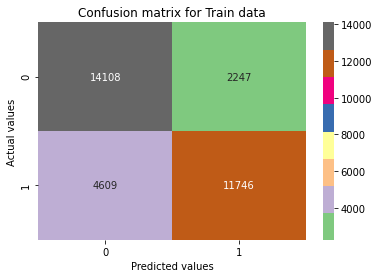

In [711]:
cmt = confusion_matrix(y_SMOTE, Log_smote_cv.predict(x_SMOTE_std))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

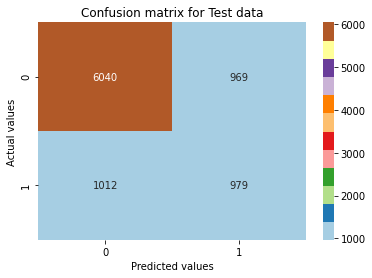

In [712]:
cmt = confusion_matrix(y_test, Log_smote_cv.predict(x_test_std))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

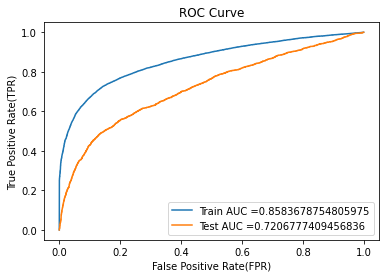

In [713]:
y_test_pred = Log_smote_cv.predict_proba(x_test_std)[:,1]
y_train_pred = Log_smote_cv.predict_proba(x_SMOTE_std)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_SMOTE, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Consolidating Logistic Regression Results

In [64]:
table = PrettyTable(['S.no.','Model','Accuracy', 'Recall', 'Precision', 'F1 Score','MathewsCorrelation Coefficient'])
table.add_row(['1.','LogisticRegression', '0.809', '0.245','0.698', '0.362', '0.333'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['1.a.','LogisticRegression+GridCV', '0.809', '0.246','0.697', '0.363', '0.333'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['1.b','LogisticRegression Upsampled', '0.774', '0.552','0.491', '0.519', '0.374'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['1.b.a','LogisticRegression Upsampled+GridCV', '0.775', '0.552','0.493', '0.521', '0.376'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['1.c','LogisticRegression Downsampled', '0.775', '0.548','0.493', '0.519', '0.374'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['1.c.a','LogisticRegression Downsampled+GridCV', '0.769', '0.563','0.482', '0.519', '0.371'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['1.d','LogisticRegression SMOTE', '0.769', '0.563','0.482', '0.519', '0.371'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['1.d.a','LogisticRegression SMOTE+GridCV', '0.78', '0.492','0.503', '0.497', '0.356'])

print(table)

+-------+---------------------------------------+----------+--------+-----------+----------+--------------------------------+
| S.no. |                 Model                 | Accuracy | Recall | Precision | F1 Score | MathewsCorrelation Coefficient |
+-------+---------------------------------------+----------+--------+-----------+----------+--------------------------------+
|   1.  |           LogisticRegression          |  0.809   | 0.245  |   0.698   |  0.362   |             0.333              |
|       |                                       |          |        |           |          |                                |
|  1.a. |       LogisticRegression+GridCV       |  0.809   | 0.246  |   0.697   |  0.363   |             0.333              |
|       |                                       |          |        |           |          |                                |
|  1.b  |      LogisticRegression Upsampled     |  0.774   | 0.552  |   0.491   |  0.519   |             0.374        

## 2. Decision Trees

In [65]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [66]:
y_pred = dt.predict(x_test)
cv_scores = cross_val_score(dt, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.391
Accuracy: 0.724
True Positives: 798
False Positive: 1294
True Negative: 5715
False Negative: 1193
Precision: 0.381
Recall: 0.401
Mathew Correlation Coefficient: 0.212
Average 5-Fold CV Score: 0.7217 , Standard deviation: 0.0084


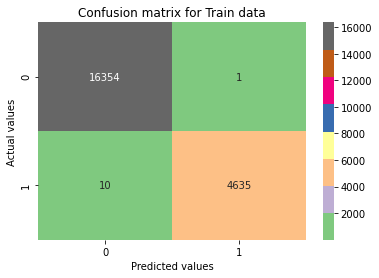

In [69]:
cmt = confusion_matrix(y_train, dt.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

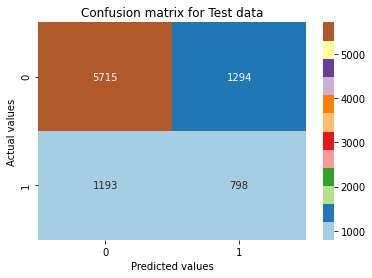

In [67]:
cmt = confusion_matrix(y_test, dt.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

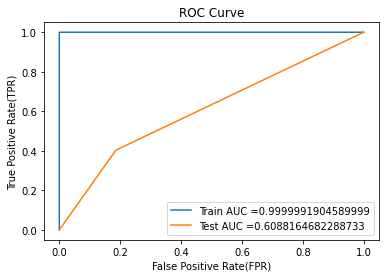

In [70]:
y_test_pred = dt.predict_proba(x_test)[:,1]
y_train_pred = dt.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 2.a. Decision Trees with GridSearchCV

In [72]:
params = {
    'max_depth' : [1,3,5,7,8,11,20],
    'min_samples_split' : [3,5,7,9,10,25],
    'max_features' : [1,2,3,4,5,6,7,8,9,10,11],
    'criterion' : ['gini','entropy']
}

model_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv=10)
model_grid.fit(x_train, y_train)
print('Best parameters after GridSearchCV are - ',model_grid.best_params_)
best_params_dt = model_grid.best_params_

Best parameters after GridSearchCV are -  {'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 3}


In [74]:
dt_cv = DecisionTreeClassifier(**best_params_dt)
dt_cv.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=10, min_samples_split=3)

In [75]:
y_pred = dt_cv.predict(x_test)
cv_scores = cross_val_score(dt_cv, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.454
Accuracy: 0.816
True Positives: 689
False Positive: 358
True Negative: 6651
False Negative: 1302
Precision: 0.658
Recall: 0.346
Mathew Correlation Coefficient: 0.382
Average 5-Fold CV Score: 0.8146 , Standard deviation: 0.01


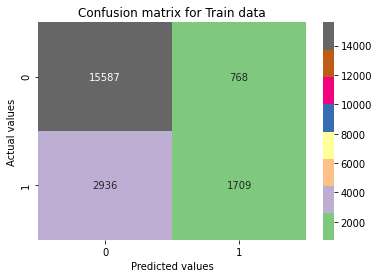

In [76]:
cmt = confusion_matrix(y_train, dt_cv.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

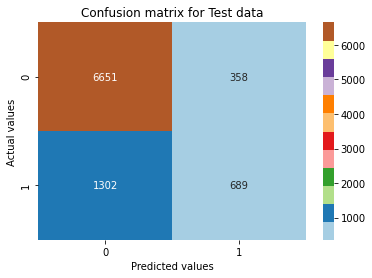

In [77]:
cmt = confusion_matrix(y_test, dt_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

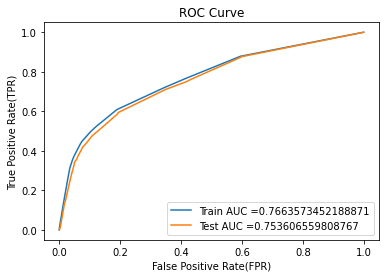

In [78]:
y_test_pred = dt_cv.predict_proba(x_test)[:,1]
y_train_pred = dt_cv.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 2.b.Decision Trees - Upsampled data

In [80]:
dt_up = DecisionTreeClassifier(random_state=0)
dt_up.fit(X_upsampled, y_upsampled)

DecisionTreeClassifier(random_state=0)

In [81]:
y_pred = dt_up.predict(x_test)
cv_scores = cross_val_score(dt_up, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.39
Accuracy: 0.729
True Positives: 777
False Positive: 1221
True Negative: 5788
False Negative: 1214
Precision: 0.389
Recall: 0.39
Mathew Correlation Coefficient: 0.216
Average 5-Fold CV Score: 0.7221 , Standard deviation: 0.0104


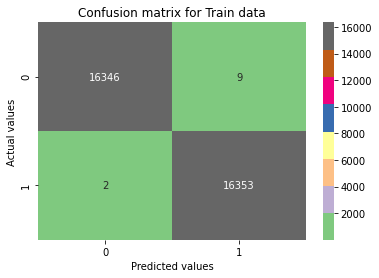

In [82]:
cmt = confusion_matrix(y_upsampled, dt_up.predict(X_upsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

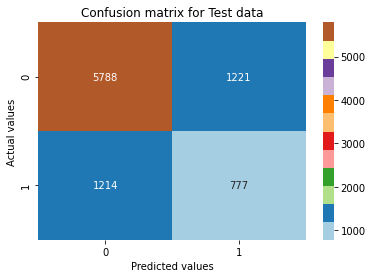

In [84]:
cmt = confusion_matrix(y_test, dt_up.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

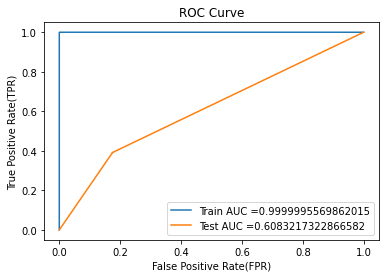

In [85]:
y_test_pred = dt_up.predict_proba(x_test)[:,1]
y_train_pred = dt_up.predict_proba(X_upsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_upsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 2.b.a.Decision Trees - Upsampled data with Grid SearchCV

In [86]:
params = {
    'max_depth' : [1,3,5,7,8,11,20],
    'min_samples_split' : [3,5,7,9,10,25],
    'max_features' : [1,2,3,4,5,6,7,8,9,10,11],
    'criterion' : ['gini','entropy']
}

model_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv=10)
model_grid.fit(X_upsampled, y_upsampled)
print('Best parameters after GridSearchCV are - ',model_grid.best_params_)
best_params_dt_up = model_grid.best_params_

Best parameters after GridSearchCV are -  {'criterion': 'gini', 'max_depth': 20, 'max_features': 9, 'min_samples_split': 3}


In [87]:
dt_up_cv = DecisionTreeClassifier(**best_params_dt_up)
dt_up_cv.fit(X_upsampled, y_upsampled)

DecisionTreeClassifier(max_depth=20, max_features=9, min_samples_split=3)

In [88]:
y_pred = dt_up_cv.predict(x_test)
cv_scores = cross_val_score(dt_up_cv, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.43
Accuracy: 0.733
True Positives: 907
False Positive: 1318
True Negative: 5691
False Negative: 1084
Precision: 0.408
Recall: 0.456
Mathew Correlation Coefficient: 0.257
Average 5-Fold CV Score: 0.758 , Standard deviation: 0.0133


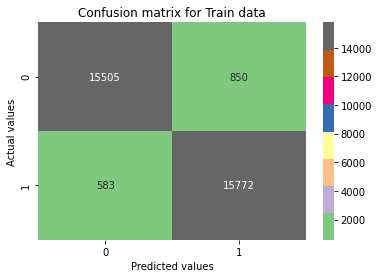

In [89]:
cmt = confusion_matrix(y_upsampled, dt_up_cv.predict(X_upsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

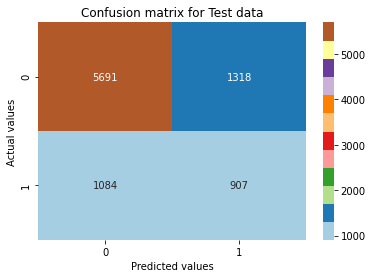

In [90]:
cmt = confusion_matrix(y_test, dt_up_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

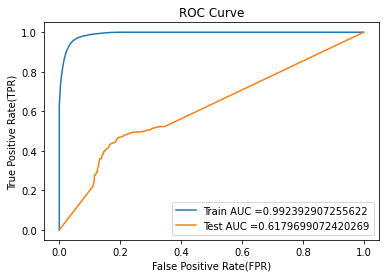

In [91]:
y_test_pred = dt_up_cv.predict_proba(x_test)[:,1]
y_train_pred = dt_up_cv.predict_proba(X_upsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_upsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 2.c Decision Trees - Downsampled Data

In [92]:
dt_down = DecisionTreeClassifier(random_state=0)
dt_down.fit(X_downsampled, y_downsampled)

DecisionTreeClassifier(random_state=0)

In [93]:
y_pred = dt_down.predict(x_test)
cv_scores = cross_val_score(dt_down, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.424
Accuracy: 0.628
True Positives: 1232
False Positive: 2592
True Negative: 4417
False Negative: 759
Precision: 0.322
Recall: 0.619
Mathew Correlation Coefficient: 0.209
Average 5-Fold CV Score: 0.7221 , Standard deviation: 0.0104


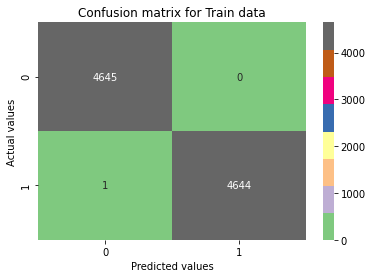

In [94]:
cmt = confusion_matrix(y_downsampled, dt_down.predict(X_downsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

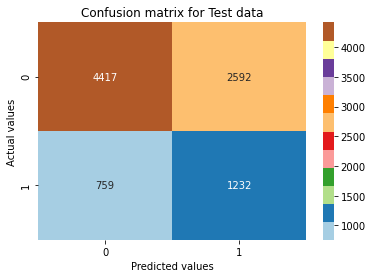

In [95]:
cmt = confusion_matrix(y_test, dt_down.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

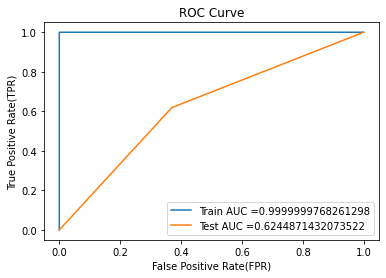

In [96]:
y_test_pred = dt_down.predict_proba(x_test)[:,1]
y_train_pred = dt_down.predict_proba(X_downsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_downsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 2.c.a Decision Trees - Downsampled Data with GridSearchCV

In [97]:
params = {
    'max_depth' : [1,3,5,7,8,11,20],
    'min_samples_split' : [3,5,7,9,10,25],
    'max_features' : [1,2,3,4,5,6,7,8,9,10,11],
    'criterion' : ['gini','entropy']
}

model_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv=10)
model_grid.fit(X_downsampled, y_downsampled)
print('Best parameters after GridSearchCV are - ',model_grid.best_params_)
best_params_dt_down = model_grid.best_params_

Best parameters after GridSearchCV are -  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 9, 'min_samples_split': 5}


In [98]:
dt_down_cv = DecisionTreeClassifier(**best_params_dt_down)
dt_down_cv.fit(X_downsampled, y_downsampled)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=9,
                       min_samples_split=5)

In [99]:
y_pred = dt_down_cv.predict(x_test)
cv_scores = cross_val_score(dt_down_cv, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.522
Accuracy: 0.763
True Positives: 1164
False Positive: 1308
True Negative: 5701
False Negative: 827
Precision: 0.471
Recall: 0.585
Mathew Correlation Coefficient: 0.37
Average 5-Fold CV Score: 0.8151 , Standard deviation: 0.0101


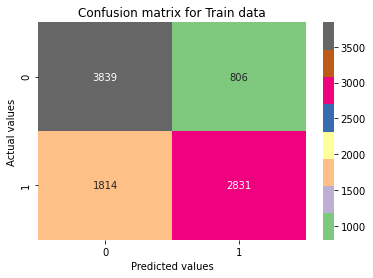

In [100]:
cmt = confusion_matrix(y_downsampled, dt_down_cv.predict(X_downsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

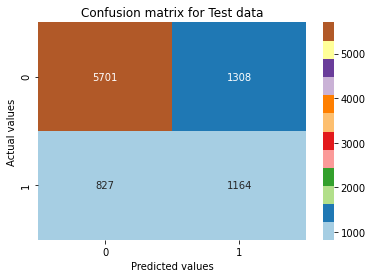

In [101]:
cmt = confusion_matrix(y_test, dt_down_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

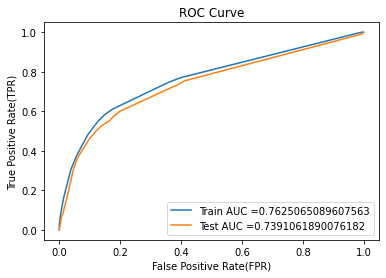

In [102]:
y_test_pred = dt_down_cv.predict_proba(x_test)[:,1]
y_train_pred = dt_down_cv.predict_proba(X_downsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_downsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 2.d. Decision Trees - SMOTE data

In [103]:
dt_smote = DecisionTreeClassifier(random_state=0)
dt_smote.fit(X_SMOTE, y_SMOTE)

DecisionTreeClassifier(random_state=0)

In [104]:
y_pred = dt_smote.predict(x_test)
cv_scores = cross_val_score(dt_smote, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.398
Accuracy: 0.696
True Positives: 902
False Positive: 1644
True Negative: 5365
False Negative: 1089
Precision: 0.354
Recall: 0.453
Mathew Correlation Coefficient: 0.201
Average 5-Fold CV Score: 0.7221 , Standard deviation: 0.0104


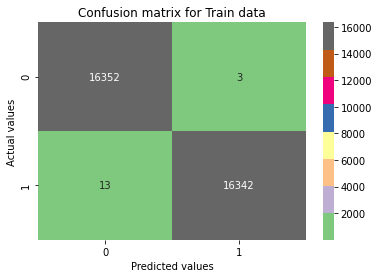

In [105]:
cmt = confusion_matrix(y_SMOTE, dt_smote.predict(X_SMOTE))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

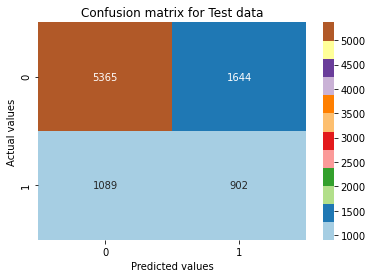

In [106]:
cmt = confusion_matrix(y_test, dt_smote.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

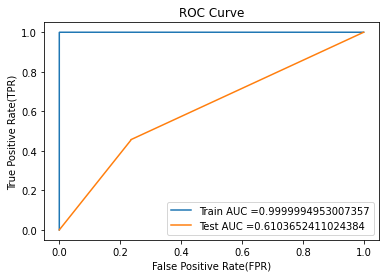

In [107]:
y_test_pred = dt_smote.predict_proba(x_test)[:,1]
y_train_pred = dt_smote.predict_proba(X_SMOTE)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_SMOTE, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 2.d.a. Decision Trees - SMOTE data with GridSearchCV

In [108]:
params = {
    'max_depth' : [1,3,5,7,8,11,20],
    'min_samples_split' : [3,5,7,9,10,25],
    'max_features' : [1,2,3,4,5,6,7,8,9,10,11],
    'criterion' : ['gini','entropy']
}

model_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv=10)
model_grid.fit(X_SMOTE, y_SMOTE)
print('Best parameters after GridSearchCV are - ',model_grid.best_params_)
best_params_dt_smote = model_grid.best_params_

Best parameters after GridSearchCV are -  {'criterion': 'gini', 'max_depth': 20, 'max_features': 10, 'min_samples_split': 3}


In [109]:
dt_smote_cv = DecisionTreeClassifier(**best_params_dt_smote)
dt_smote_cv.fit(X_SMOTE, y_SMOTE)

DecisionTreeClassifier(max_depth=20, max_features=10, min_samples_split=3)

In [110]:
y_pred = dt_smote_cv.predict(x_test)
cv_scores = cross_val_score(dt_smote_cv, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.41
Accuracy: 0.713
True Positives: 897
False Positive: 1489
True Negative: 5520
False Negative: 1094
Precision: 0.376
Recall: 0.451
Mathew Correlation Coefficient: 0.224
Average 5-Fold CV Score: 0.7601 , Standard deviation: 0.0121


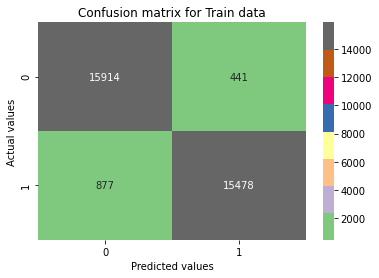

In [111]:
cmt = confusion_matrix(y_SMOTE, dt_smote_cv.predict(X_SMOTE))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

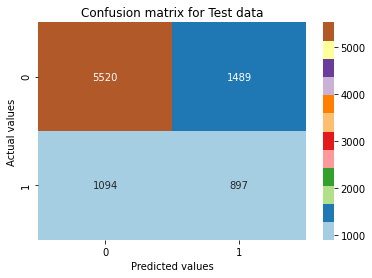

In [112]:
cmt = confusion_matrix(y_test, dt_smote_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

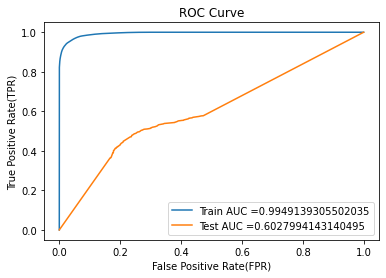

In [113]:
y_test_pred = dt_smote_cv.predict_proba(x_test)[:,1]
y_train_pred = dt_smote_cv.predict_proba(X_SMOTE)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_SMOTE, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Consolidating Decision Tree Results

In [82]:
table = PrettyTable(['S.no.','Model','Accuracy', 'Recall', 'Precision', 'F1 Score','MathewsCorrelation Coefficient'])
table.add_row(['2.','DecisonTree', '0.724', '0.401','0.381', '0.391', '0.212'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['2.a.','DecisonTree+GridCV', '0.816', '0.346','0.658', '0.454', '0.382'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['2.b','DecisonTree Upsampled', '0.729', '0.39','0.389', '0.39', '0.216'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['2.b.a','DecisonTree Upsampled+GridCV', '0.733', '0.456','0.408', '0.43', '0.257'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['2.c','DecisonTree Downsampled', '0.628', '0.619','0.322', '0.424', '0.209'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['2.c.a','DecisonTree Downsampled+GridCV', '0.763', '0.585','0.471', '0.522', '0.37'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['2.d','DecisonTree SMOTE', '0.696', '0.453','0.354', '0.398', '0.201'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['2.d.a','DecisonTree SMOTE+GridCV', '0.713', '0.451','0.376', '0.41', '0.224'])

print(table)

+-------+--------------------------------+----------+--------+-----------+----------+--------------------------------+
| S.no. |             Model              | Accuracy | Recall | Precision | F1 Score | MathewsCorrelation Coefficient |
+-------+--------------------------------+----------+--------+-----------+----------+--------------------------------+
|   2.  |          DecisonTree           |  0.724   | 0.401  |   0.381   |  0.391   |             0.212              |
|       |                                |          |        |           |          |                                |
|  2.a. |       DecisonTree+GridCV       |  0.816   | 0.346  |   0.658   |  0.454   |             0.382              |
|       |                                |          |        |           |          |                                |
|  2.b  |     DecisonTree Upsampled      |  0.729   |  0.39  |   0.389   |   0.39   |             0.216              |
|       |                                |      

## 3. Random Forests

In [115]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [116]:
y_pred = rf.predict(x_test)
cv_scores = cross_val_score(rf, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.455
Accuracy: 0.811
True Positives: 710
False Positive: 420
True Negative: 6589
False Negative: 1281
Precision: 0.628
Recall: 0.357
Mathew Correlation Coefficient: 0.372
Average 5-Fold CV Score: 0.8137 , Standard deviation: 0.0076


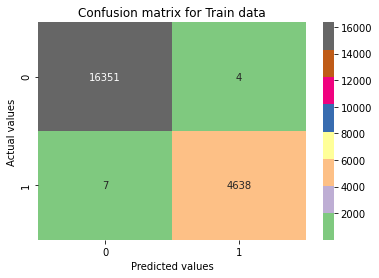

In [117]:
cmt = confusion_matrix(y_train, rf.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

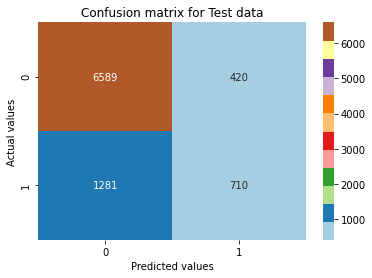

In [118]:
cmt = confusion_matrix(y_test, rf.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

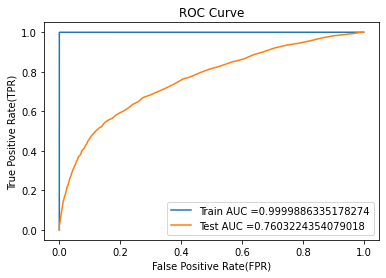

In [119]:
y_test_pred = rf.predict_proba(x_test)[:,1]
y_train_pred = rf.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 3.a. Random Forests with GridSearchCV

In [122]:
param_grid = { 
    'n_estimators': [100,150,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid,cv=5 ,verbose=2)
rf_grid.fit(x_train, y_train)
print('Best Hyper-parameters are - ',rf_grid.best_params_)
best_params_rf = rf_grid.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   1.0s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, total=   1.5s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, total=   1.5s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_es

[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=200, total=   1.9s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, total=   5.1s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, total=   5.0s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, total=   4.9s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, total=   4.8s
[CV] criterion=gini, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=gini, max_depth=4, max_features=log2, n_estimators=500, total=   4.8s
[CV] criterion=gini, max_depth=5, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=auto, n_es

[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=150, total=   1.7s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=150, total=   1.8s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=150 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=150, total=   1.8s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=200, total=   2.4s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=200, total=   2.4s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_estimators=200, total=   2.5s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_es

[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=100, total=   1.4s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=100, total=   1.4s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=100, total=   1.4s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=100, total=   1.4s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=100, total=   1.4s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=150 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=150, total=   2.1s
[CV] criterion=gini, max_depth=6, max_features=log2, n_estimators=150 
[CV]  criterion=gini, max_depth=6, max_features=log2, n_es

[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, total=   3.1s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, total=   3.0s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, total=   7.7s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, total=   7.6s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, total=   7.6s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, total=   7.5s
[CV] criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=7, max_features=sqrt, n_es

[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, total=   2.7s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, total=   2.6s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, total=   2.6s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, total=   2.6s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, total=   3.5s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, total=   3.5s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_es

[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=500, total=   6.8s
[CV] criterion=entropy, max_depth=4, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=auto, n_estimators=500, total=   6.8s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, total=   1.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, total=   1.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, total=   1.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100, total=   1.4s
[CV] criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=150, total=   2.5s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=200, total=   3.3s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=200, total=   3.3s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=200, total=   3.3s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=200, total=   3.4s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=200 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=200, total=   3.3s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=500 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, total=   1.9s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, total=   1.9s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, total=   1.9s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, total=   1.9s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=100, total=   1.9s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=150 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=150, total=   2.9s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=150 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=200, total=   3.8s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=200, total=   3.8s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=200, total=   3.7s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=200, total=   3.7s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=500, total=   9.2s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=log2, n_estimators=500, total=   9.3s
[CV] criterion=entropy, max_depth=6, max_features=log2, n_estimators=500 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, total=   2.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, total=   2.1s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, total=   2.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   3.3s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   3.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   3.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, total=   4.8s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, total=   4.8s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, total=  12.1s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, total=  12.0s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, total=  12.0s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, total=  12.2s
[CV] criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  criterion=entrop

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 38.7min finished


Best Hyper-parameters are -  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 150}


In [123]:
rf_cv = RandomForestClassifier(**best_params_rf)
rf_cv.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=150)

In [124]:
y_pred = rf_cv.predict(x_test)
cv_scores = cross_val_score(rf_cv, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.458
Accuracy: 0.817
True Positives: 695
False Positive: 349
True Negative: 6660
False Negative: 1296
Precision: 0.666
Recall: 0.349
Mathew Correlation Coefficient: 0.388
Average 5-Fold CV Score: 0.8188 , Standard deviation: 0.0095


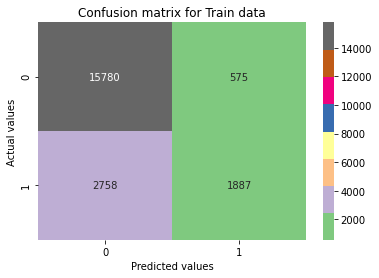

In [125]:
cmt = confusion_matrix(y_train, rf_cv.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

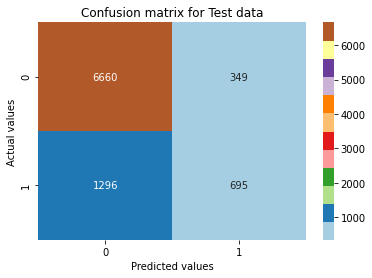

In [126]:
cmt = confusion_matrix(y_test, rf_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

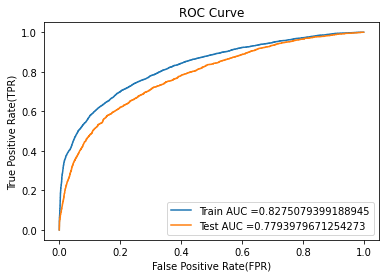

In [127]:
y_test_pred = rf_cv.predict_proba(x_test)[:,1]
y_train_pred = rf_cv.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 3.b. Random Forests - UpSampled Data

In [129]:
rf_up = RandomForestClassifier(random_state=0)
rf_up.fit(X_upsampled,y_upsampled)

RandomForestClassifier(random_state=0)

In [130]:
y_pred = rf_up.predict(x_test)
cv_scores = cross_val_score(rf_up, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.475
Accuracy: 0.802
True Positives: 805
False Positive: 593
True Negative: 6416
False Negative: 1186
Precision: 0.576
Recall: 0.404
Mathew Correlation Coefficient: 0.366
Average 5-Fold CV Score: 0.8137 , Standard deviation: 0.0076


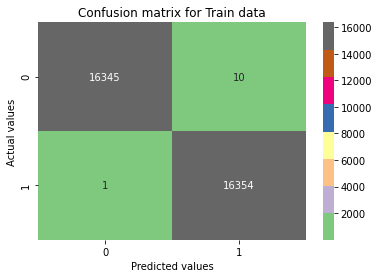

In [131]:
cmt = confusion_matrix(y_upsampled, rf_up.predict(X_upsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

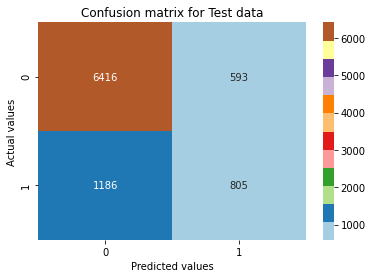

In [133]:
cmt = confusion_matrix(y_test, rf_up.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

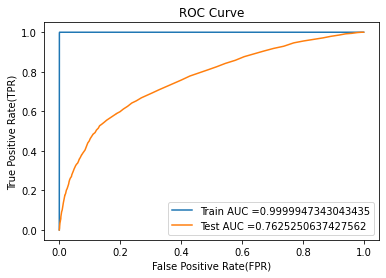

In [134]:
y_test_pred = rf_up.predict_proba(x_test)[:,1]
y_train_pred = rf_up.predict_proba(X_upsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_upsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 3.b.a. Random Forests - UpSampled Data with GridSearchCV

In [135]:
param_grid = { 
    'n_estimators': [100,150,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid,cv=3 ,verbose=2)
rf_grid.fit(X_upsampled, y_upsampled)
print('Best Hyper-parameters are - ',rf_grid.best_params_)
best_params_rf_up = rf_grid.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   1.3s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   1.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   1.2s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, total=   1.8s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, total=   1.8s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, total=   1.9s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, total=   2.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_es

[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, total=   2.9s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, total=   2.9s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, total=   2.8s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, total=   7.2s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, total=   7.3s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, total=   7.2s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_es

[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, total=   8.2s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=100, total=   1.9s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=100, total=   1.8s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=100, total=   1.8s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=150, total=   2.8s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=150, total=   2.8s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_es

[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, total=   3.1s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, total=   3.1s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, total=   4.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, total=   4.1s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, total=   4.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, total=  10.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_es

[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   3.1s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   3.1s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, total=   7.8s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, total=   7.7s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, total=   7.7s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=100, total=   1.9s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=100 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, total=  10.8s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, total=  10.8s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, total=   2.2s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, total=   2.2s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, total=   2.2s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150, total=   3.3s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, total=   2.5s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, total=   2.5s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   3.7s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   3.7s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   3.8s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=200, total=   5.0s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=200 
[CV]  criterion=entrop

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 27.3min finished


Best Hyper-parameters are -  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 150}


In [136]:
rf_up_cv = RandomForestClassifier(**best_params_rf_up)
rf_up_cv.fit(X_upsampled, y_upsampled)

RandomForestClassifier(max_depth=8, n_estimators=150)

In [137]:
y_pred = rf_up_cv.predict(x_test)
cv_scores = cross_val_score(rf_up_cv, X, Y, cv=5)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.542
Accuracy: 0.779
True Positives: 1179
False Positive: 1178
True Negative: 5831
False Negative: 812
Precision: 0.5
Recall: 0.592
Mathew Correlation Coefficient: 0.4
Average 5-Fold CV Score: 0.8192 , Standard deviation: 0.0098


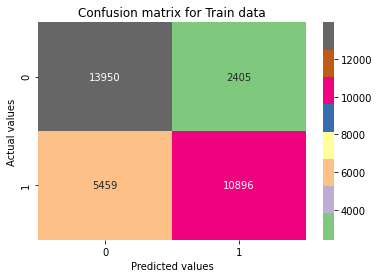

In [138]:
cmt = confusion_matrix(y_upsampled, rf_up_cv.predict(X_upsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

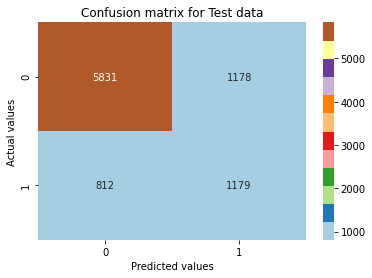

In [139]:
cmt = confusion_matrix(y_test, rf_up_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

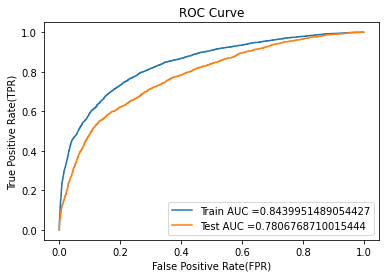

In [140]:
y_test_pred = rf_up_cv.predict_proba(x_test)[:,1]
y_train_pred = rf_up_cv.predict_proba(X_upsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_upsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 3.c. Random Forests - Downsampled Data 

In [58]:
rf_down = RandomForestClassifier(random_state=0)
rf_down.fit(X_downsampled, y_downsampled)

RandomForestClassifier(random_state=0)

In [59]:
y_pred = rf_down.predict(x_test)
cv_scores = cross_val_score(rf_down, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.518
Accuracy: 0.736
True Positives: 1275
False Positive: 1657
True Negative: 5352
False Negative: 716
Precision: 0.435
Recall: 0.64
Mathew Correlation Coefficient: 0.358
Average 5-Fold CV Score: 0.8142 , Standard deviation: 0.0057


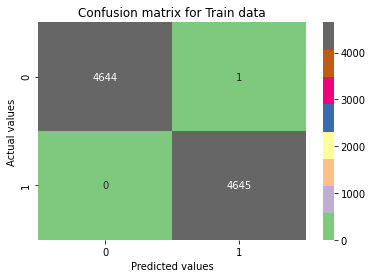

In [60]:
cmt = confusion_matrix(y_downsampled, rf_down.predict(X_downsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

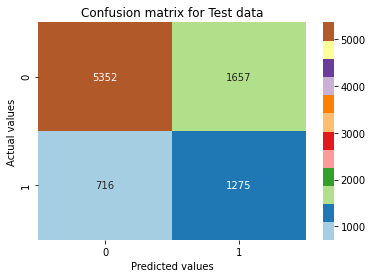

In [61]:
cmt = confusion_matrix(y_test, rf_down.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

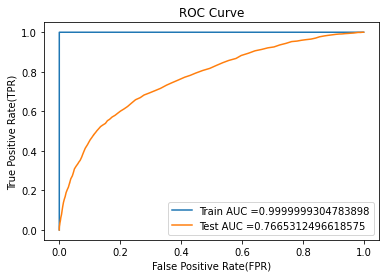

In [62]:
y_test_pred = rf_down.predict_proba(x_test)[:,1]
y_train_pred = rf_down.predict_proba(X_downsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_downsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 3.c. Random Forests - Downsampled Data with GridSearchCV

In [64]:
param_grid = { 
    'n_estimators': [100,150,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid,cv=3 ,verbose=2)
rf_grid.fit(X_downsampled, y_downsampled)
print('Best Hyper-parameters are - ',rf_grid.best_params_)
best_params_rf_dw = rf_grid.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, total=   0.8s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_es

[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, total=   2.3s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, total=   2.3s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, total=   2.3s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_es

[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, total=   2.6s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=100, total=   0.6s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=100, total=   0.6s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=100, total=   0.6s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=150, total=   0.9s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=150, total=   0.9s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_es

[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, total=   1.0s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, total=   1.0s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, total=   1.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, total=   1.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, total=   1.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, total=   3.2s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_es

[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   1.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   1.0s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, total=   2.6s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, total=   2.6s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, total=   2.6s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=100, total=   0.6s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=100 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, total=   3.7s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, total=   3.6s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, total=   0.7s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, total=   0.7s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, total=   0.7s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150, total=   1.1s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, total=   0.8s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, total=   0.8s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   1.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   1.2s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   1.3s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=200, total=   1.7s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=200 
[CV]  criterion=entrop

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  8.9min finished


Best Hyper-parameters are -  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 500}


In [65]:
rf_down_cv = RandomForestClassifier(**best_params_rf_dw)
rf_down_cv.fit(X_downsampled, y_downsampled)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       n_estimators=500)

In [66]:
y_pred = rf_down_cv.predict(x_test)
cv_scores = cross_val_score(rf_down_cv, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.535
Accuracy: 0.769
True Positives: 1198
False Positive: 1290
True Negative: 5719
False Negative: 793
Precision: 0.482
Recall: 0.602
Mathew Correlation Coefficient: 0.388
Average 5-Fold CV Score: 0.8147 , Standard deviation: 0.0044


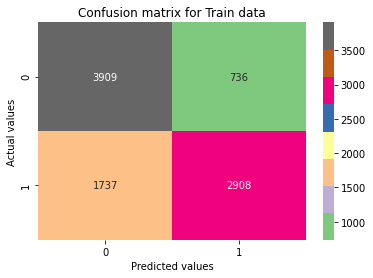

In [67]:
cmt = confusion_matrix(y_downsampled, rf_down_cv.predict(X_downsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

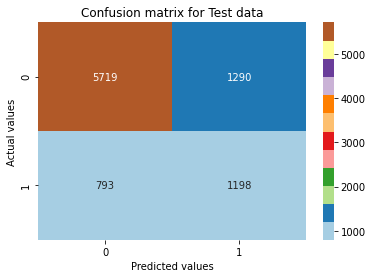

In [68]:
cmt = confusion_matrix(y_test, rf_down_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

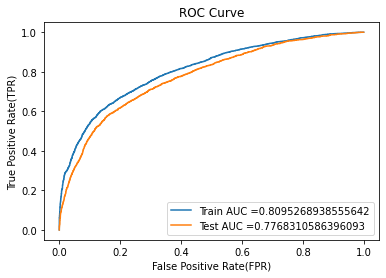

In [69]:
y_test_pred = rf_down_cv.predict_proba(x_test)[:,1]
y_train_pred = rf_down_cv.predict_proba(X_downsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_downsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 3.d. Random Forests - SMOTE Data

In [70]:
rf_down_smote = RandomForestClassifier(random_state=0)
rf_down_smote.fit(X_SMOTE, y_SMOTE)

RandomForestClassifier(random_state=0)

In [71]:
y_pred = rf_down_smote.predict(x_test)
cv_scores = cross_val_score(rf_down_smote, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.497
Accuracy: 0.796
True Positives: 910
False Positive: 758
True Negative: 6251
False Negative: 1081
Precision: 0.546
Recall: 0.457
Mathew Correlation Coefficient: 0.373
Average 5-Fold CV Score: 0.8142 , Standard deviation: 0.0057


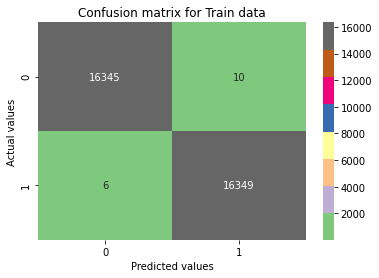

In [72]:
cmt = confusion_matrix(y_SMOTE, rf_down_smote.predict(X_SMOTE))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

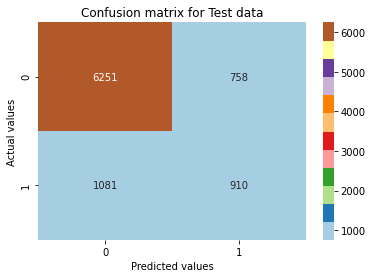

In [73]:
cmt = confusion_matrix(y_test, rf_down_smote.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

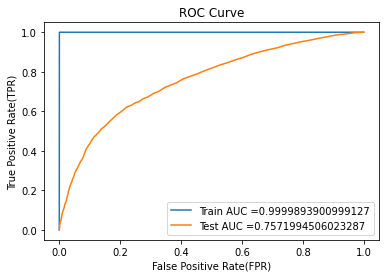

In [74]:
y_test_pred = rf_down_smote.predict_proba(x_test)[:,1]
y_train_pred = rf_down_smote.predict_proba(X_SMOTE)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_SMOTE, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 3.d.a. Random Forests - SMOTE Data with GridSearchCV

In [75]:
param_grid = { 
    'n_estimators': [100,150,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid,cv=3 ,verbose=2)
rf_grid.fit(X_downsampled, y_downsampled)
print('Best Hyper-parameters are - ',rf_grid.best_params_)
best_params_rf_sm = rf_grid.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=150, total=   0.6s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_estimators=200, total=   0.8s
[CV] criterion=gini, max_depth=4, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=4, max_features=auto, n_es

[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, total=   0.9s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, total=   2.3s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, total=   2.2s
[CV] criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, total=   2.3s
[CV] criterion=gini, max_depth=5, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=5, max_features=log2, n_es

[CV]  criterion=gini, max_depth=6, max_features=log2, n_estimators=500, total=   2.6s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=100, total=   0.6s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=100, total=   0.6s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=100, total=   0.6s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=150, total=   0.9s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_estimators=150, total=   0.9s
[CV] criterion=gini, max_depth=7, max_features=auto, n_estimators=150 
[CV]  criterion=gini, max_depth=7, max_features=auto, n_es

[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, total=   1.0s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=150, total=   1.0s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, total=   1.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, total=   1.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, total=   1.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, total=   3.3s
[CV] criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500 
[CV]  criterion=gini, max_depth=8, max_features=sqrt, n_es

[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   1.1s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=200, total=   1.1s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, total=   2.7s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, total=   2.7s
[CV] criterion=entropy, max_depth=4, max_features=log2, n_estimators=500 
[CV]  criterion=entropy, max_depth=4, max_features=log2, n_estimators=500, total=   2.7s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=100 
[CV]  criterion=entropy, max_depth=5, max_features=auto, n_estimators=100, total=   0.7s
[CV] criterion=entropy, max_depth=5, max_features=auto, n_estimators=100 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, total=   3.8s
[CV] criterion=entropy, max_depth=6, max_features=auto, n_estimators=500 
[CV]  criterion=entropy, max_depth=6, max_features=auto, n_estimators=500, total=   3.8s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, total=   0.8s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, total=   0.8s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, total=   0.8s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150 
[CV]  criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150, total=   1.1s
[CV] criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=150 
[CV]  criterion=entrop

[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, total=   0.9s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=100, total=   0.9s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   1.3s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   1.3s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=150 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=150, total=   1.3s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=200 
[CV]  criterion=entropy, max_depth=7, max_features=log2, n_estimators=200, total=   1.7s
[CV] criterion=entropy, max_depth=7, max_features=log2, n_estimators=200 
[CV]  criterion=entrop

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  9.1min finished


Best Hyper-parameters are -  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}


In [76]:
rf_down_smote_cv = RandomForestClassifier(**best_params_rf_sm)
rf_down_smote_cv.fit(X_SMOTE, y_SMOTE)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200)

In [77]:
y_pred = rf_down_smote_cv.predict(x_test)
cv_scores = cross_val_score(rf_down_smote_cv, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.524
Accuracy: 0.781
True Positives: 1083
False Positive: 1059
True Negative: 5950
False Negative: 908
Precision: 0.506
Recall: 0.544
Mathew Correlation Coefficient: 0.383
Average 5-Fold CV Score: 0.8154 , Standard deviation: 0.0044


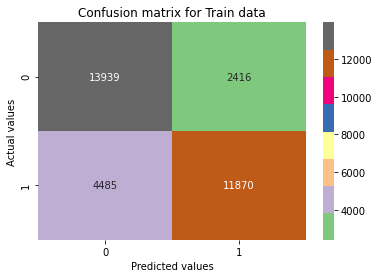

In [78]:
cmt = confusion_matrix(y_SMOTE, rf_down_smote_cv.predict(X_SMOTE))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

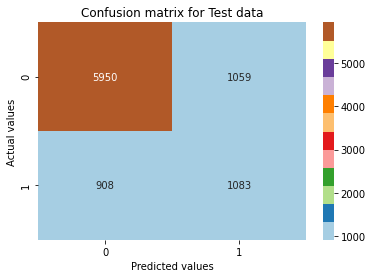

In [79]:
cmt = confusion_matrix(y_test, rf_down_smote_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

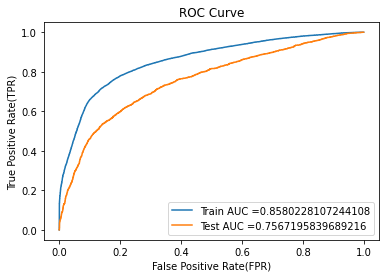

In [80]:
y_test_pred = rf_down_smote_cv.predict_proba(x_test)[:,1]
y_train_pred = rf_down_smote_cv.predict_proba(X_SMOTE)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_SMOTE, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Consolidating Random Forests Results

In [83]:
table = PrettyTable(['S.no.','Model','Accuracy', 'Recall', 'Precision', 'F1 Score','MathewsCorrelation Coefficient'])
table.add_row(['3.','RandomForests', '0.811', '0.357','0.628', '0.455', '0.372'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['3.a.','RandomForests+GridCV', '0.817', '0.349','0.666', '0.458', '0.388'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['3.b','RandomForests Upsampled', '0.802', '0.404','0.576', '0.475', '0.366'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['3.b.a','RandomForests Upsampled+GridCV', '0.779', '0.592','0.5', '0.542', '0.4'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['3.c','RandomForests Downsampled', '0.736', '0.64','0.435', '0.518', '0.358'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['3.c.a','RandomForests Downsampled+GridCV', '0.769', '0.602','0.482', '0.535', '0.388'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['3.d','RandomForests SMOTE', '0.796', '0.457','0.546', '0.497', '0.373'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['3.d.a','RandomForests SMOTE+GridCV', '0.781', '0.544','0.506', '0.524', '0.383'])

print(table)

+-------+----------------------------------+----------+--------+-----------+----------+--------------------------------+
| S.no. |              Model               | Accuracy | Recall | Precision | F1 Score | MathewsCorrelation Coefficient |
+-------+----------------------------------+----------+--------+-----------+----------+--------------------------------+
|   3.  |          RandomForests           |  0.811   | 0.357  |   0.628   |  0.455   |             0.372              |
|       |                                  |          |        |           |          |                                |
|  3.a. |       RandomForests+GridCV       |  0.817   | 0.349  |   0.666   |  0.458   |             0.388              |
|       |                                  |          |        |           |          |                                |
|  3.b  |     RandomForests Upsampled      |  0.802   | 0.404  |   0.576   |  0.475   |             0.366              |
|       |                       

## 4. Gradient Boosting

In [89]:
gbd = GradientBoostingClassifier()
gbd.fit(x_train, y_train)

GradientBoostingClassifier()

In [90]:
y_pred = gbd.predict(x_test)
cv_scores = cross_val_score(gbd, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.466
Accuracy: 0.818
True Positives: 714
False Positive: 361
True Negative: 6648
False Negative: 1277
Precision: 0.664
Recall: 0.359
Mathew Correlation Coefficient: 0.393
Average 5-Fold CV Score: 0.82 , Standard deviation: 0.0071


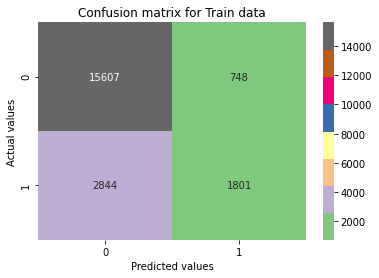

In [91]:
cmt = confusion_matrix(y_train, gbd.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

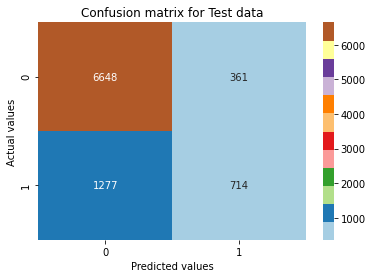

In [92]:
cmt = confusion_matrix(y_test, gbd.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

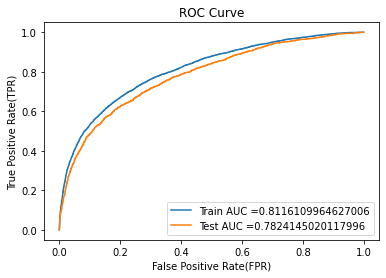

In [94]:
y_test_pred = gbd.predict_proba(x_test)[:,1]
y_train_pred = gbd.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 4.a. Gradient Boosting with GridSearchCV

In [98]:
params = {
        'learning_rate':[0.1,0.5,1.0], 
        'n_estimators':[100,250,500,1000]
         }

tuning = GridSearchCV(GradientBoostingClassifier(), param_grid=params,cv=3,verbose=2)
tuning.fit(x_train,y_train)
print('Best Hyper-parameters are - ',tuning.best_params_)
best_params_gbm = tuning.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. learning_rate=0.1, n_estimators=100, total=   4.9s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] .............. learning_rate=0.1, n_estimators=100, total=   4.9s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   4.9s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=  12.3s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=  12.2s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=  12.3s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .............. learning_rate=0.1, n_estimators=500, total=  24.6s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .............. learning_rate=0.1, n_estimators=500, total=  24.4s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 13.5min finished


Best Hyper-parameters are -  {'learning_rate': 0.1, 'n_estimators': 100}


In [99]:
gbd_cv = GradientBoostingClassifier(**best_params_gbm)
gbd_cv.fit(x_train, y_train)

GradientBoostingClassifier()

In [100]:
y_pred = gbd_cv.predict(x_test)
cv_scores = cross_val_score(gbd_cv, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.465
Accuracy: 0.818
True Positives: 713
False Positive: 360
True Negative: 6649
False Negative: 1278
Precision: 0.664
Recall: 0.358
Mathew Correlation Coefficient: 0.393
Average 5-Fold CV Score: 0.82 , Standard deviation: 0.0072


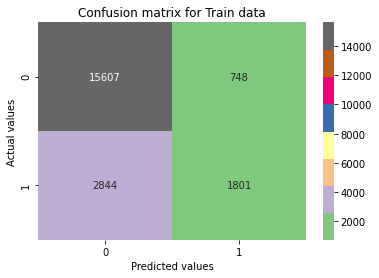

In [101]:
cmt = confusion_matrix(y_train, gbd_cv.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

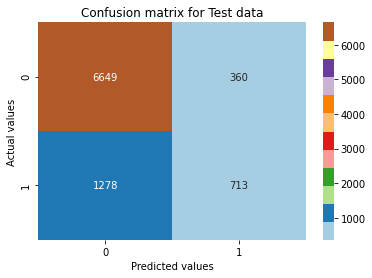

In [102]:
cmt = confusion_matrix(y_test, gbd_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

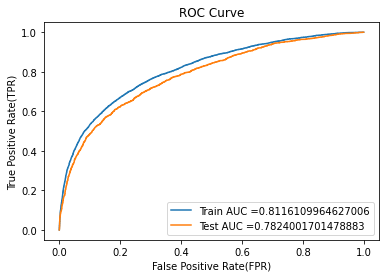

In [103]:
y_test_pred = gbd_cv.predict_proba(x_test)[:,1]
y_train_pred = gbd_cv.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 4.b Gradient Boosting - Upsampled Data

In [104]:
gbd_up = GradientBoostingClassifier(random_state=0)
gbd_up.fit(X_upsampled, y_upsampled)

GradientBoostingClassifier(random_state=0)

In [105]:
y_pred = gbd_up.predict(x_test)
cv_scores = cross_val_score(gbd_up, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.535
Accuracy: 0.762
True Positives: 1231
False Positive: 1381
True Negative: 5628
False Negative: 760
Precision: 0.471
Recall: 0.618
Mathew Correlation Coefficient: 0.385
Average 5-Fold CV Score: 0.82 , Standard deviation: 0.0071


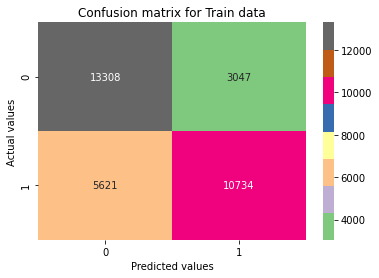

In [106]:
cmt = confusion_matrix(y_upsampled, gbd_up.predict(X_upsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

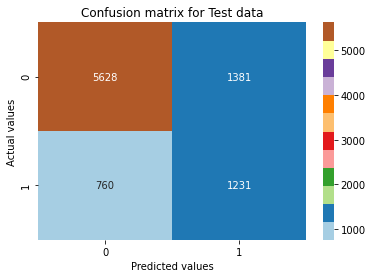

In [107]:
cmt = confusion_matrix(y_test, gbd_up.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

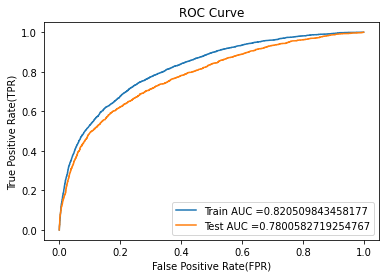

In [108]:
y_test_pred = gbd_up.predict_proba(x_test)[:,1]
y_train_pred = gbd_up.predict_proba(X_upsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_upsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 4.b.a Gradient Boosting - Upsampled Data with GridSearchCV

In [109]:
params = {
        'learning_rate':[0.1,0.5,1.0], 
        'n_estimators':[100,250,500]
         }
tuning = GridSearchCV(GradientBoostingClassifier(), param_grid=params,cv=3,verbose=2)
tuning.fit(X_upsampled,y_upsampled)
print('Best Hyper-parameters are - ',tuning.best_params_)
best_params_gbm_up = tuning.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. learning_rate=0.1, n_estimators=100, total=   7.2s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV] .............. learning_rate=0.1, n_estimators=100, total=   7.1s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   7.2s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=  18.3s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=  18.2s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=  18.2s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .............. learning_rate=0.1, n_estimators=500, total=  36.6s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .............. learning_rate=0.1, n_estimators=500, total=  36.6s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  9.3min finished


Best Hyper-parameters are -  {'learning_rate': 1.0, 'n_estimators': 500}


In [110]:
gbd_up_cv = GradientBoostingClassifier(**best_params_gbm_up)
gbd_up_cv.fit(X_upsampled, y_upsampled)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=500)

In [111]:
y_pred = gbd_up_cv.predict(x_test)
cv_scores = cross_val_score(gbd_up_cv, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.461
Accuracy: 0.745
True Positives: 984
False Positive: 1290
True Negative: 5719
False Negative: 1007
Precision: 0.433
Recall: 0.494
Mathew Correlation Coefficient: 0.296
Average 5-Fold CV Score: 0.7725 , Standard deviation: 0.0071


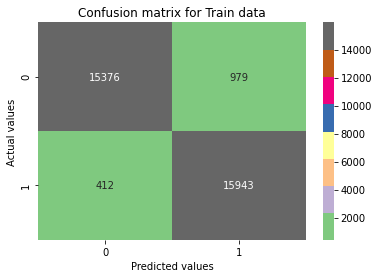

In [112]:
cmt = confusion_matrix(y_upsampled, gbd_up_cv.predict(X_upsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

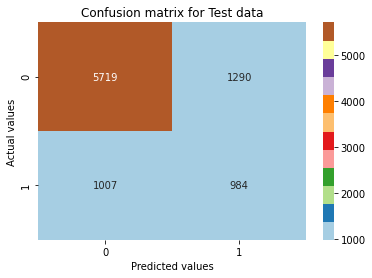

In [113]:
cmt = confusion_matrix(y_test, gbd_up_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

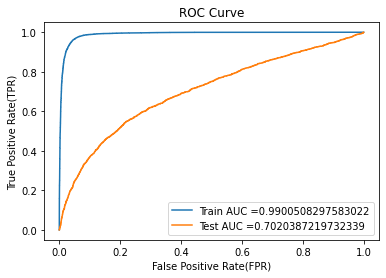

In [114]:
y_test_pred = gbd_up_cv.predict_proba(x_test)[:,1]
y_train_pred = gbd_up_cv .predict_proba(X_upsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_upsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 4.c. Gradient Boosting - Downsampled Data

In [115]:
gbd_dw = GradientBoostingClassifier(random_state=0)
gbd_dw.fit(X_downsampled, y_downsampled)

GradientBoostingClassifier(random_state=0)

In [116]:
y_pred = gbd_dw.predict(x_test)
cv_scores = cross_val_score(gbd_dw, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.534
Accuracy: 0.756
True Positives: 1256
False Positive: 1459
True Negative: 5550
False Negative: 735
Precision: 0.463
Recall: 0.631
Mathew Correlation Coefficient: 0.382
Average 5-Fold CV Score: 0.82 , Standard deviation: 0.0071


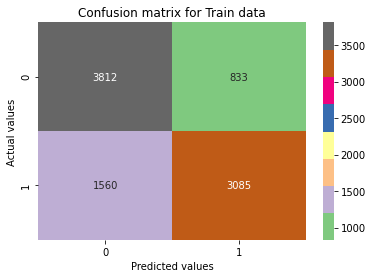

In [117]:
cmt = confusion_matrix(y_downsampled, gbd_dw.predict(X_downsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

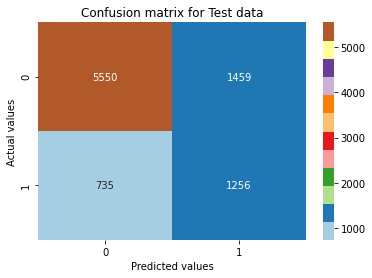

In [118]:
cmt = confusion_matrix(y_test, gbd_dw.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

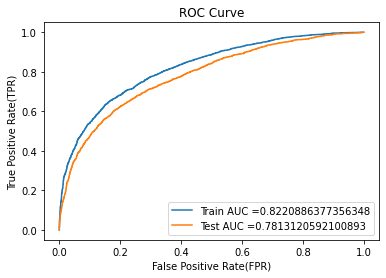

In [119]:
y_test_pred = gbd_dw.predict_proba(x_test)[:,1]
y_train_pred = gbd_dw .predict_proba(X_downsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_downsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 4.c.a. Gradient Boosting - Downsampled Data with GridSearchCV

In [120]:
params = {
        'learning_rate':[0.1,0.5,1.0], 
        'n_estimators':[100,250,500]
         }
tuning = GridSearchCV(GradientBoostingClassifier(), param_grid=params,cv=3,verbose=2)
tuning.fit(X_downsampled, y_downsampled)
print('Best Hyper-parameters are - ',tuning.best_params_)
best_params_gbm_dw_cv = tuning.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. learning_rate=0.1, n_estimators=100, total=   2.1s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .............. learning_rate=0.1, n_estimators=100, total=   2.0s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   2.1s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=   5.2s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=   5.1s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=   5.2s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .............. learning_rate=0.1, n_estimators=500, total=  10.4s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .............. learning_rate=0.1, n_estimators=500, total=  10.3s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  2.6min finished


Best Hyper-parameters are -  {'learning_rate': 0.1, 'n_estimators': 100}


In [121]:
gbd_dw_cv = GradientBoostingClassifier(**best_params_gbm_dw_cv)
gbd_dw_cv.fit(X_downsampled, y_downsampled)

GradientBoostingClassifier()

In [122]:
y_pred = gbd_dw_cv.predict(x_test)
cv_scores = cross_val_score(gbd_dw_cv, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.534
Accuracy: 0.756
True Positives: 1255
False Positive: 1457
True Negative: 5552
False Negative: 736
Precision: 0.463
Recall: 0.63
Mathew Correlation Coefficient: 0.382
Average 5-Fold CV Score: 0.82 , Standard deviation: 0.0072


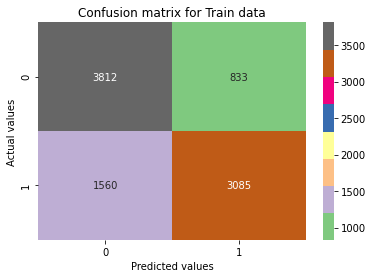

In [123]:
cmt = confusion_matrix(y_downsampled, gbd_dw_cv.predict(X_downsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

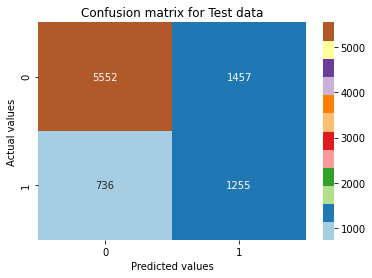

In [124]:
cmt = confusion_matrix(y_test, gbd_dw_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

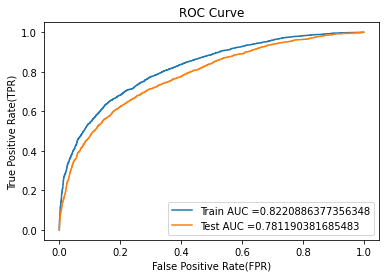

In [125]:
y_test_pred = gbd_dw_cv.predict_proba(x_test)[:,1]
y_train_pred = gbd_dw_cv .predict_proba(X_downsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_downsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 4.d. Gradient Boosting - SMOTE Data

In [127]:
gbd_smote = GradientBoostingClassifier(random_state=0)
gbd_smote.fit(X_SMOTE, y_SMOTE)

GradientBoostingClassifier(random_state=0)

In [128]:
y_pred = gbd_smote.predict(x_test)
cv_scores = cross_val_score(gbd_smote, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.515
Accuracy: 0.794
True Positives: 985
False Positive: 851
True Negative: 6158
False Negative: 1006
Precision: 0.536
Recall: 0.495
Mathew Correlation Coefficient: 0.385
Average 5-Fold CV Score: 0.82 , Standard deviation: 0.0071


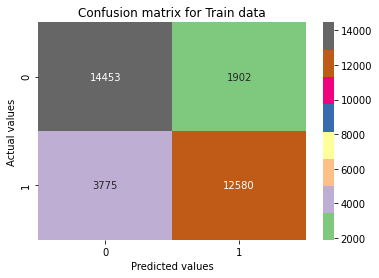

In [129]:
cmt = confusion_matrix(y_SMOTE, gbd_smote.predict(X_SMOTE))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

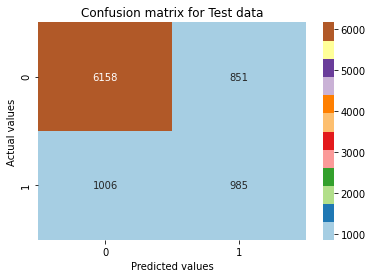

In [130]:
cmt = confusion_matrix(y_test, gbd_smote.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

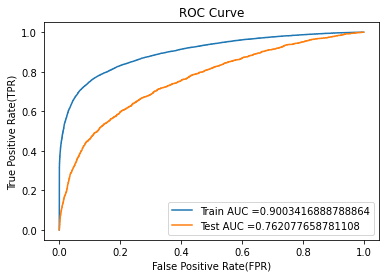

In [131]:
y_test_pred = gbd_smote.predict_proba(x_test)[:,1]
y_train_pred = gbd_smote.predict_proba(X_SMOTE)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_SMOTE, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 4.d.a Gradient Boosting - SMOTE Data with GridSearchCV

In [132]:
params = {
        'learning_rate':[0.1,0.5,1.0], 
        'n_estimators':[100,250,500]
         }
tuning = GridSearchCV(GradientBoostingClassifier(), param_grid=params,cv=3,verbose=2)
tuning.fit(X_SMOTE, y_SMOTE)
print('Best Hyper-parameters are - ',tuning.best_params_)
best_params_gbm_sm_cv = tuning.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. learning_rate=0.1, n_estimators=100, total=   8.5s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV] .............. learning_rate=0.1, n_estimators=100, total=   8.2s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV] .............. learning_rate=0.1, n_estimators=100, total=   8.2s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=  21.4s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=  20.6s
[CV] learning_rate=0.1, n_estimators=250 .............................
[CV] .............. learning_rate=0.1, n_estimators=250, total=  20.6s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .............. learning_rate=0.1, n_estimators=500, total=  42.4s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .............. learning_rate=0.1, n_estimators=500, total=  41.1s
[CV] learning_rate=0.1, n_estimators=500 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 10.6min finished


Best Hyper-parameters are -  {'learning_rate': 0.1, 'n_estimators': 500}


In [133]:
gbd_smote_cv = GradientBoostingClassifier(**best_params_gbm_sm_cv)
gbd_smote_cv.fit(X_SMOTE, y_SMOTE)

GradientBoostingClassifier(n_estimators=500)

In [134]:
y_pred = gbd_smote_cv.predict(x_test)
cv_scores = cross_val_score(gbd_smote_cv, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

F1 score: 0.505
Accuracy: 0.803
True Positives: 906
False Positive: 692
True Negative: 6317
False Negative: 1085
Precision: 0.567
Recall: 0.455
Mathew Correlation Coefficient: 0.387
Average 5-Fold CV Score: 0.816 , Standard deviation: 0.0054


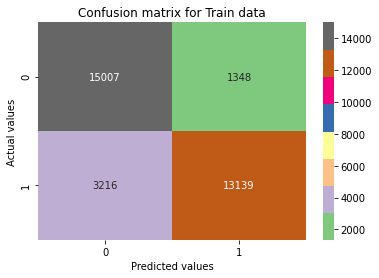

In [135]:
cmt = confusion_matrix(y_SMOTE, gbd_smote_cv.predict(X_SMOTE))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

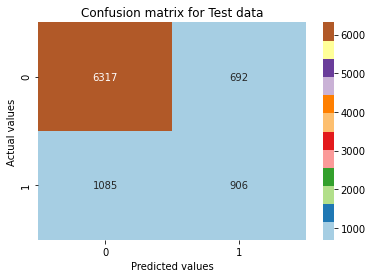

In [136]:
cmt = confusion_matrix(y_test, gbd_smote_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

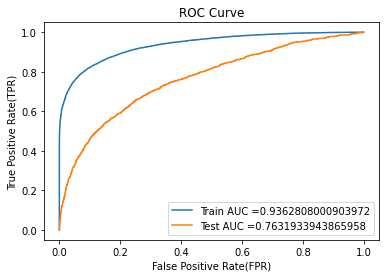

In [137]:
y_test_pred = gbd_smote_cv.predict_proba(x_test)[:,1]
y_train_pred = gbd_smote_cv.predict_proba(X_SMOTE)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_SMOTE, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Consolidating GradientBoosting Results

In [139]:
table = PrettyTable(['S.no.','Model','Accuracy', 'Recall', 'Precision', 'F1 Score','MathewsCorrelation Coefficient'])
table.add_row(['4.','GradientBoosting', '0.818', '0.359','0.664', '0.466', '0.393'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['4.a.','GradientBoosting+GridCV', '0.818', '0.358','0.664', '0.465', '0.393'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['4.b','GradientBoosting Upsampled', '0.762', '0.618','0.471', '0.535', '0.385'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['4.b.a','GradientBoosting Upsampled+GridCV', '0.745', '0.494','0.433', '0.461', '0.296'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['4.c','GradientBoosting Downsampled', '0.756', '0.631','0.463', '0.534', '0.382'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['4.c.a','GradientBoosting Downsampled+GridCV', '0.756', '0.63','0.463', '0.534', '0.382'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['4.d','GradientBoosting SMOTE', '0.794', '0.495','0.536', '0.515', '0.385'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['4.d.a','GradientBoosting SMOTE+GridCV', '0.803', '0.455','0.567', '0.505', '0.387'])
print(table)

+-------+-------------------------------------+----------+--------+-----------+----------+--------------------------------+
| S.no. |                Model                | Accuracy | Recall | Precision | F1 Score | MathewsCorrelation Coefficient |
+-------+-------------------------------------+----------+--------+-----------+----------+--------------------------------+
|   4.  |           GradientBoosting          |  0.818   | 0.359  |   0.664   |  0.466   |             0.393              |
|       |                                     |          |        |           |          |                                |
|  4.a. |       GradientBoosting+GridCV       |  0.818   | 0.358  |   0.664   |  0.465   |             0.393              |
|       |                                     |          |        |           |          |                                |
|  4.b  |      GradientBoosting Upsampled     |  0.762   | 0.618  |   0.471   |  0.535   |             0.385              |
|       

## 5. Xgboost

In [140]:
xg_boost = xgb.XGBClassifier(random_state=0)
xg_boost.fit(x_train,y_train)

[20:44:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
y_pred = xg_boost.predict(x_test)
cv_scores = cross_val_score(xg_boost, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

[20:45:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score: 0.46
Accuracy: 0.811
True Positives: 724
False Positive: 433

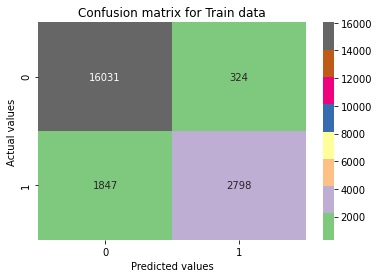

In [142]:
cmt = confusion_matrix(y_train, xg_boost.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

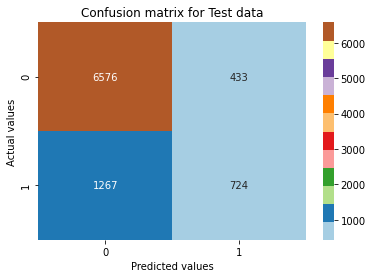

In [143]:
cmt = confusion_matrix(y_test, xg_boost.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

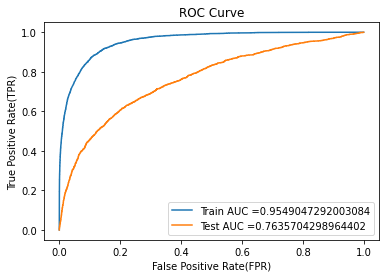

In [144]:
y_test_pred = xg_boost.predict_proba(x_test)[:,1]
y_train_pred = xg_boost.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 5.a. Xgboost with GridSearchCV

In [149]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

xgboost_cv = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [150]:
xgboost_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


[20:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [151]:
y_pred = xgboost_cv.predict(x_test)
cv_scores = cross_val_score(xgboost_cv, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.6min finished


[21:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


[21:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.6min finished


[21:07:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score: 0.467
Accuracy: 0.807
True Positives: 760
False Positive: 507
True Negative: 6502
False Negative: 1231
Precision: 0.6
Recall: 0.382
Mathew Correlation Coefficient: 0.369
Average 5-Fold CV Score: 0.8058 , Standard deviation: 0.0061


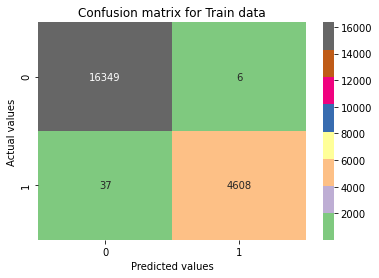

In [152]:
cmt = confusion_matrix(y_train, xgboost_cv.predict(x_train))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

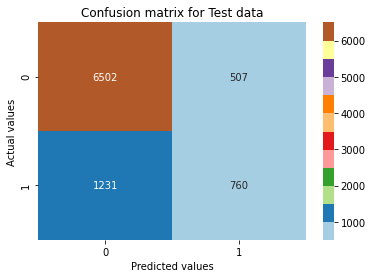

In [153]:
cmt = confusion_matrix(y_test, xgboost_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

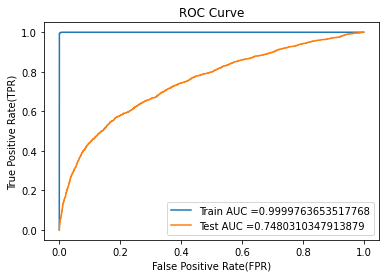

In [154]:
y_test_pred = xgboost_cv.predict_proba(x_test)[:,1]
y_train_pred = xgboost_cv.predict_proba(x_train)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 5.b Xgboost - Upsampled Data

In [155]:
xg_boost_up = xgb.XGBClassifier(random_state=0)
xg_boost_up.fit(X_upsampled,y_upsampled)

[21:08:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [156]:
y_pred = xg_boost_up.predict(x_test)
cv_scores = cross_val_score(xg_boost_up, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

[21:08:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:08:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score: 0.521
Accuracy: 0.769
True Positives: 1132
False Positive: 1

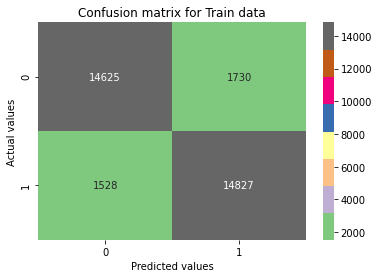

In [157]:
cmt = confusion_matrix(y_upsampled, xg_boost_up.predict(X_upsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

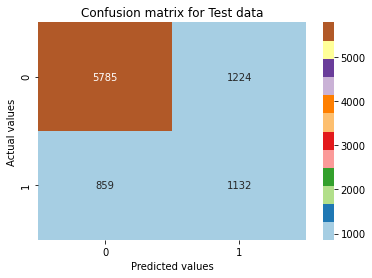

In [158]:
cmt = confusion_matrix(y_test, xg_boost_up.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

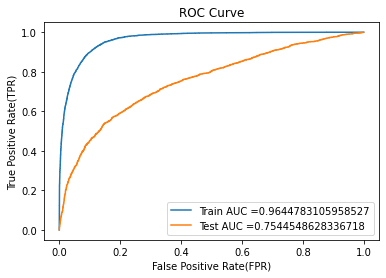

In [159]:
y_test_pred = xg_boost_up.predict_proba(x_test)[:,1]
y_train_pred = xg_boost_up.predict_proba(X_upsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_upsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 5.b.a Xgboost - Upsampled Data with GridSearchCV

In [160]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

xgboost_up_cv = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [161]:
xgboost_up_cv.fit(X_upsampled,y_upsampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.5min finished


[21:12:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [162]:
y_pred = xgboost_up_cv.predict(x_test)
cv_scores = cross_val_score(xgboost_up_cv, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.6min finished


[21:15:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished


[21:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished


[21:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score: 0.477
Accuracy: 0.8
True Positives: 821
False Positive: 630
True Negative: 6379
False Negative: 1170
Precision: 0.566
Recall: 0.412
Mathew Correlation Coefficient: 0.364
Average 5-Fold CV Score: 0.8058 , Standard deviation: 0.0061


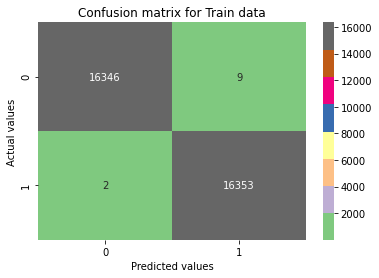

In [163]:
cmt = confusion_matrix(y_upsampled, xgboost_up_cv.predict(X_upsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

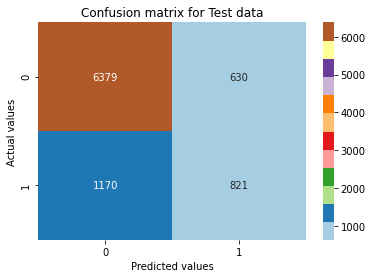

In [164]:
cmt = confusion_matrix(y_test, xgboost_up_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

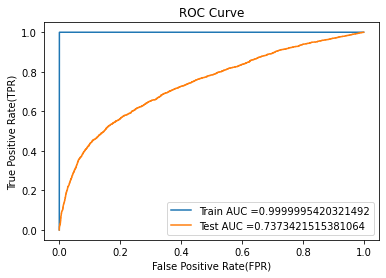

In [165]:
y_test_pred = xgboost_up_cv.predict_proba(x_test)[:,1]
y_train_pred = xgboost_up_cv.predict_proba(X_upsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_upsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 5.c Xgboost - Downsampled

In [167]:
xg_boost_dw = xgb.XGBClassifier(random_state=0)
xg_boost_dw.fit(X_downsampled,y_downsampled)

[21:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
y_pred = xg_boost_dw.predict(x_test)
cv_scores = cross_val_score(xg_boost_dw, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

[21:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score: 0.504
Accuracy: 0.716
True Positives: 1296
False Positive: 1

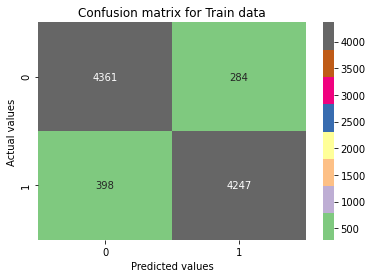

In [169]:
cmt = confusion_matrix(y_downsampled, xg_boost_dw.predict(X_downsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

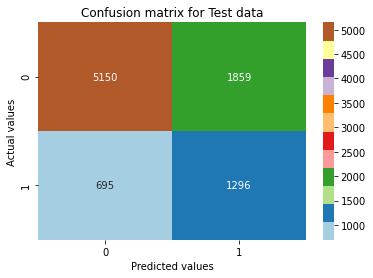

In [170]:
cmt = confusion_matrix(y_test, xg_boost_dw.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

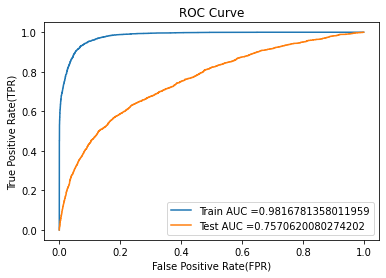

In [171]:
y_test_pred = xg_boost_dw.predict_proba(x_test)[:,1]
y_train_pred = xg_boost_dw.predict_proba(X_downsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_downsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 5.c.a Xgboost - Downsampled Data with GridSearchCV

In [177]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

xgboost_dw_cv = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [178]:
xgboost_dw_cv.fit(X_downsampled, y_downsampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


[21:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [179]:
y_pred = xgboost_dw_cv.predict(x_test)
cv_scores = cross_val_score(xgboost_dw_cv, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


[21:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished


[21:45:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished


[21:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score: 0.496
Accuracy: 0.703
True Positives: 1313
False Positive: 1993
True Negative: 5016
False Negative: 678
Precision: 0.397
Recall: 0.659
Mathew Correlation Coefficient: 0.323
Average 5-Fold CV Score: 0.8058 , Standard deviation: 0.0061


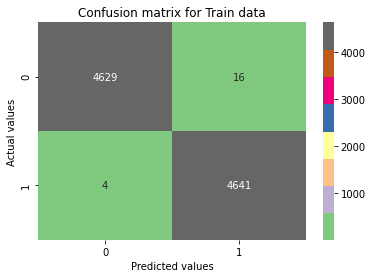

In [180]:
cmt = confusion_matrix(y_downsampled, xgboost_dw_cv.predict(X_downsampled))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

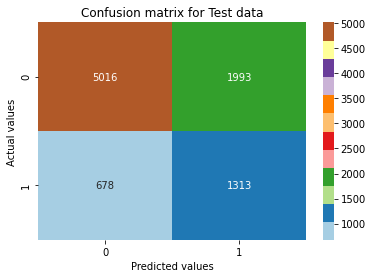

In [181]:
cmt = confusion_matrix(y_test, xgboost_dw_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

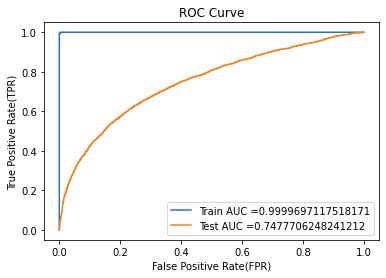

In [182]:
y_test_pred = xgboost_dw_cv.predict_proba(x_test)[:,1]
y_train_pred = xgboost_dw_cv.predict_proba(X_downsampled)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_downsampled, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 5.d. Xgboost - SMOTE

In [172]:
xg_boost_sm = xgb.XGBClassifier(random_state=0)
xg_boost_sm.fit(X_SMOTE,y_SMOTE)

[21:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
y_pred = xg_boost_sm.predict(x_test)
cv_scores = cross_val_score(xg_boost_sm, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

[21:32:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score: 0.488
Accuracy: 0.795
True Positives: 879
False Positive: 73

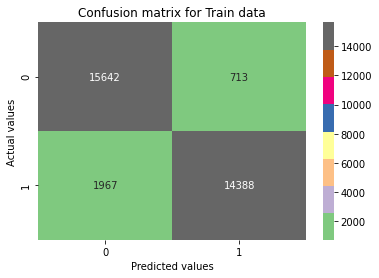

In [174]:
cmt = confusion_matrix(y_SMOTE, xg_boost_sm.predict(X_SMOTE))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

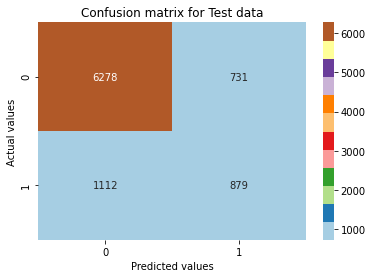

In [175]:
cmt = confusion_matrix(y_test, xg_boost_sm.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

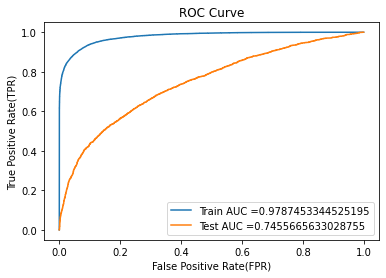

In [176]:
y_test_pred = xg_boost_sm.predict_proba(x_test)[:,1]
y_train_pred = xg_boost_sm.predict_proba(X_SMOTE)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_SMOTE, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 5.d.a Xgboost - SMOTE with GridSearchCV

In [183]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

xgboost_sm_cv = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [184]:
xgboost_sm_cv.fit(X_SMOTE, y_SMOTE)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.8min finished


[21:53:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [185]:
y_pred = xgboost_sm_cv.predict(x_test)
cv_scores = cross_val_score(xgboost_sm_cv, X, Y, cv=3)
TP = np.sum(np.logical_and(y_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred == 0, y_test == 1))
pred = len(y_pred)

print("F1 score: {}".format(round(f1_score(y_true = y_test, y_pred = y_pred),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = y_pred),3)))
print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),3)))
print('Recall: {}'.format(round(TP/(TP+FN),3)))
print('Mathew Correlation Coefficient: {}'.format(round(matthews_corrcoef(y_true= y_test, y_pred = y_pred),3)))
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.6min finished


[21:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished


[22:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.6min finished


[22:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score: 0.477
Accuracy: 0.796
True Positives: 838
False Positive: 686
True Negative: 6323
False Negative: 1153
Precision: 0.55
Recall: 0.421
Mathew Correlation Coefficient: 0.357
Average 5-Fold CV Score: 0.8058 , Standard deviation: 0.0061


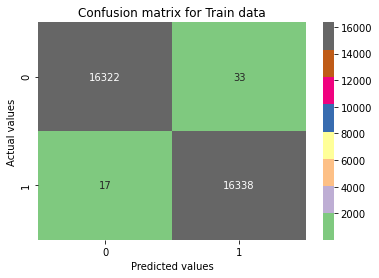

In [186]:
cmt = confusion_matrix(y_SMOTE, xgboost_sm_cv.predict(X_SMOTE))
sns.heatmap(cmt, annot=True,fmt='d',cmap='Accent')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Train data')
plt.show()

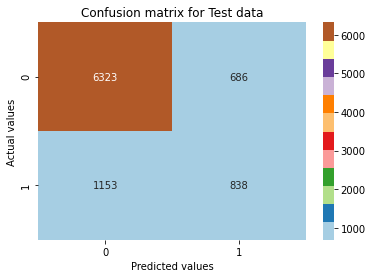

In [187]:
cmt = confusion_matrix(y_test, xgboost_sm_cv.predict(x_test))
sns.heatmap(cmt, annot=True, cmap="Paired", fmt='d')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion matrix for Test data')
plt.show()

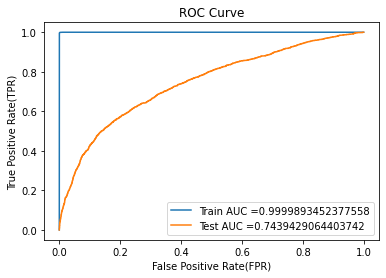

In [188]:
y_test_pred = xgboost_sm_cv.predict_proba(x_test)[:,1]
y_train_pred = xgboost_sm_cv.predict_proba(X_SMOTE)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_SMOTE, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = 'Train AUC ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'Test AUC ='+str(auc(test_fpr, test_tpr)))
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

##  Consolidating all Xgboost Results

In [189]:
table = PrettyTable(['S.no.','Model','Accuracy', 'Recall', 'Precision', 'F1 Score','MathewsCorrelation Coefficient'])
table.add_row(['5.','Xgboost', '0.811', '0.364','0.626', '0.46', '0.374'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['5.a.','Xgboost+GridCV', '0.807', '0.382','0.6', '0.467', '0.369'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['5.b','Xgboost Upsampled', '0.769', '0.569','0.48', '0.521', '0.372'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['5.b.a','Xgboost Upsampled+GridCV', '0.8', '0.412','0.566', '0.477', '0.364'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['5.c','Xgboost Downsampled', '0.716', '0.651','0.411', '0.504', '0.336'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['5.c.a','Xgboost Downsampled+GridCV', '0.703', '0.659','0.397', '0.496', '0.323'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['5.d','Xgboost SMOTE', '0.795', '0.441','0.546', '0.488', '0.365'])
table.add_row([' ',' ', ' ', ' ',' ', ' ', ' '])
table.add_row(['5.d.a','Xgboost SMOTE+GridCV', '0.769', '0.421','0.55', '0.477', '0.357'])

print(table)

+-------+----------------------------+----------+--------+-----------+----------+--------------------------------+
| S.no. |           Model            | Accuracy | Recall | Precision | F1 Score | MathewsCorrelation Coefficient |
+-------+----------------------------+----------+--------+-----------+----------+--------------------------------+
|   5.  |          Xgboost           |  0.811   | 0.364  |   0.626   |   0.46   |             0.374              |
|       |                            |          |        |           |          |                                |
|  5.a. |       Xgboost+GridCV       |  0.807   | 0.382  |    0.6    |  0.467   |             0.369              |
|       |                            |          |        |           |          |                                |
|  5.b  |     Xgboost Upsampled      |  0.769   | 0.569  |    0.48   |  0.521   |             0.372              |
|       |                            |          |        |           |          